In [1]:
#Importamos modulos
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import timeit
from datetime import datetime
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#from google.colab import files

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploración inicial de datos

## Dataset de movilidad

Carga de fichero y selección de datos relativos a las comunidades autónomas

In [98]:
google = pd.read_csv('../datasets/raw_data/mobility_google.csv', ',', index_col='Unnamed: 0')
google = google[google.sub_region_2.isna()]

In [99]:
google.head()

country_region_code country_region sub_region_1  sub_region_2  metro_area  \
0                  ES          Spain    Andalusia           NaN         NaN   
1                  ES          Spain    Andalusia           NaN         NaN   
2                  ES          Spain    Andalusia           NaN         NaN   
3                  ES          Spain    Andalusia           NaN         NaN   
4                  ES          Spain    Andalusia           NaN         NaN   

  iso_3166_2_code  census_fips_code        date  \
0           ES-AN               NaN  2020-02-15   
1           ES-AN               NaN  2020-02-16   
2           ES-AN               NaN  2020-02-17   
3           ES-AN               NaN  2020-02-18   
4           ES-AN               NaN  2020-02-19   

   retail_and_recreation_percent_change_from_baseline  \
0                                                5.0    
1                                                6.0    
2                                                0.0    
3                                               -1.0    
4                                                0.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                               -1.0   
1                                                4.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   parks_percent_change_from_baseline  \
0                                33.0   
1                                17.0   
2                                10.0   
3                                 6.0   
4                                 7.0   

   transit_stations_percent_change_from_baseline  \
0                                           15.0   
1                                           10.0   
2                                            8.0   
3                                            7.0   
4                                            6.0   

   workplaces_percent_change_from_baseline  \
0                                      0.0   
1                                      1.0   
2                                      4.0   
3                                      4.0   
4                                      3.0   

   residential_percent_change_from_baseline  
0                                      -2.0  
1                                      -4.0  
2                                      -1.0  
3                                      -1.0  
4                                       0.0

In [100]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 3666
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 3667 non-null   object 
 1   country_region                                      3667 non-null   object 
 2   sub_region_1                                        3667 non-null   object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     3667 non-null   object 
 6   census_fips_code                                    0 non-null      float64
 7   date                                                3667 non-null   object 
 8   retail_and_recreation_percent_change_from_baseline  3667 non-null   float64
 9

In [101]:
google.country_region_code.unique()

array(['ES'], dtype=object)

In [102]:
google.country_region.unique()

array(['Spain'], dtype=object)

In [103]:
#Comprobación de nombres de CCAA
google.sub_region_1.unique()

array(['Andalusia', 'Aragon', 'Asturias', 'Balearic Islands',
       'Basque Country', 'Canary Islands', 'Cantabria',
       'Castile and León', 'Castile-La Mancha', 'Catalonia', 'Ceuta',
       'Community of Madrid', 'Extremadura', 'Galicia', 'La Rioja',
       'Melilla', 'Navarre', 'Region of Murcia', 'Valencian Community'],
      dtype=object)

In [104]:
google.sub_region_1.value_counts()

Extremadura            193
Andalusia              193
Ceuta                  193
Balearic Islands       193
Cantabria              193
Castile-La Mancha      193
Castile and León       193
La Rioja               193
Asturias               193
Region of Murcia       193
Melilla                193
Navarre                193
Canary Islands         193
Galicia                193
Valencian Community    193
Basque Country         193
Catalonia              193
Community of Madrid    193
Aragon                 193
Name: sub_region_1, dtype: int64

In [105]:
#Comprobación de nombres de CCAA
google.sub_region_2.unique()

array([nan])

In [106]:
google.iso_3166_2_code.unique()

array(['ES-AN', 'ES-AR', 'ES-AS', 'ES-IB', 'ES-PV', 'ES-CN', 'ES-CB',
       'ES-CL', 'ES-CM', 'ES-CT', 'ES-CE', 'ES-MD', 'ES-EX', 'ES-GA',
       'ES-RI', 'ES-ML', 'ES-NC', 'ES-MC', 'ES-VC'], dtype=object)

In [107]:
google.iso_3166_2_code.value_counts()

ES-AN    193
ES-CL    193
ES-NC    193
ES-MC    193
ES-ML    193
ES-AS    193
ES-PV    193
ES-IB    193
ES-CT    193
ES-GA    193
ES-EX    193
ES-CN    193
ES-CM    193
ES-MD    193
ES-AR    193
ES-CB    193
ES-RI    193
ES-CE    193
ES-VC    193
Name: iso_3166_2_code, dtype: int64

In [108]:
google.date.unique()

array(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-

In [109]:
google['date'].value_counts()

2020-06-20    19
2020-03-02    19
2020-03-31    19
2020-03-06    19
2020-05-25    19
              ..
2020-07-20    19
2020-03-23    19
2020-07-10    19
2020-08-19    19
2020-07-21    19
Name: date, Length: 193, dtype: int64

In [110]:
display (google.shape)
display (google.describe().T)

(3667, 14)

count       mean  \
sub_region_2                                           0.0        NaN   
metro_area                                             0.0        NaN   
census_fips_code                                       0.0        NaN   
retail_and_recreation_percent_change_from_baseline  3667.0 -40.435233   
grocery_and_pharmacy_percent_change_from_baseline   3592.0 -19.523664   
parks_percent_change_from_baseline                  3667.0   3.511590   
transit_stations_percent_change_from_baseline       3439.0 -40.160512   
workplaces_percent_change_from_baseline             3667.0 -33.405509   
residential_percent_change_from_baseline            3461.0  11.007512   

                                                          std   min    25%  \
sub_region_2                                              NaN   NaN    NaN   
metro_area                                                NaN   NaN    NaN   
census_fips_code                                          NaN   NaN    NaN   
retail_and_recreation_percent_change_from_baseline  35.653969 -97.0 -82.00   
grocery_and_pharmacy_percent_change_from_baseline   25.545914 -94.0 -38.25   
parks_percent_change_from_baseline                  72.164471 -93.0 -58.00   
transit_stations_percent_change_from_baseline       30.784759 -93.0 -69.00   
workplaces_percent_change_from_baseline             25.336276 -92.0 -55.00   
residential_percent_change_from_baseline            11.518342  -7.0   2.00   

                                                     50%   75%    max  
sub_region_2                                         NaN   NaN    NaN  
metro_area                                           NaN   NaN    NaN  
census_fips_code                                     NaN   NaN    NaN  
retail_and_recreation_percent_change_from_baseline -31.0 -10.0   56.0  
grocery_and_pharmacy_percent_change_from_baseline  -13.0  -1.0   55.0  
parks_percent_change_from_baseline                   4.0  36.0  563.0  
transit_stations_percent_change_from_baseline      -38.0 -18.0   34.0  
workplaces_percent_change_from_baseline            -33.0 -13.0   25.0  
residential_percent_change_from_baseline             7.0  21.0   46.0

In [111]:
google.isna().sum()

country_region_code                                      0
country_region                                           0
sub_region_1                                             0
sub_region_2                                          3667
metro_area                                            3667
iso_3166_2_code                                          0
census_fips_code                                      3667
date                                                     0
retail_and_recreation_percent_change_from_baseline       0
grocery_and_pharmacy_percent_change_from_baseline       75
parks_percent_change_from_baseline                       0
transit_stations_percent_change_from_baseline          228
workplaces_percent_change_from_baseline                  0
residential_percent_change_from_baseline               206
dtype: int64

In [112]:
#Rango de fechas del dataset
min_fecha_google=google.date.min()
max_fecha_google=google.date.max()
print ("Rango fechas dataset Google:     " + str (min_fecha_google) + " a " + str (max_fecha_google))


Rango fechas dataset Google:     2020-02-15 a 2020-08-25


C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


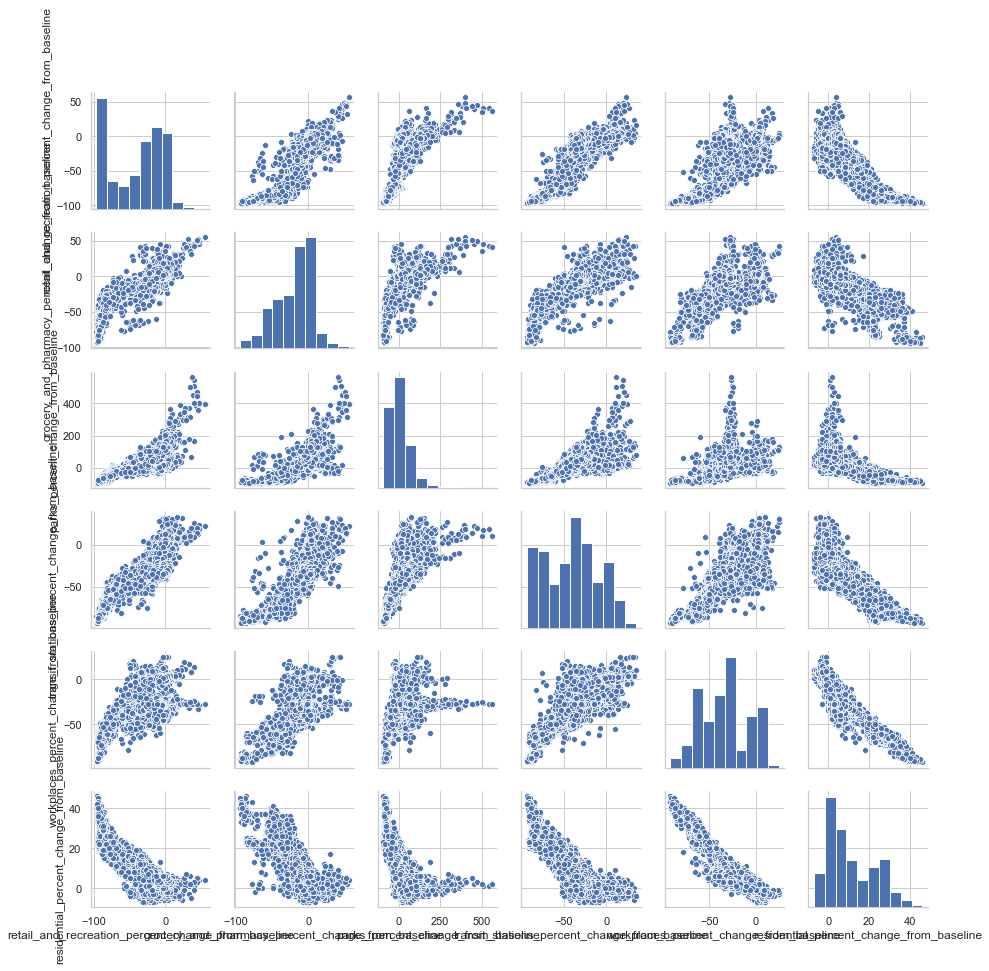

In [113]:
cols_movilidad =['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']
sns.pairplot(google[cols_movilidad])

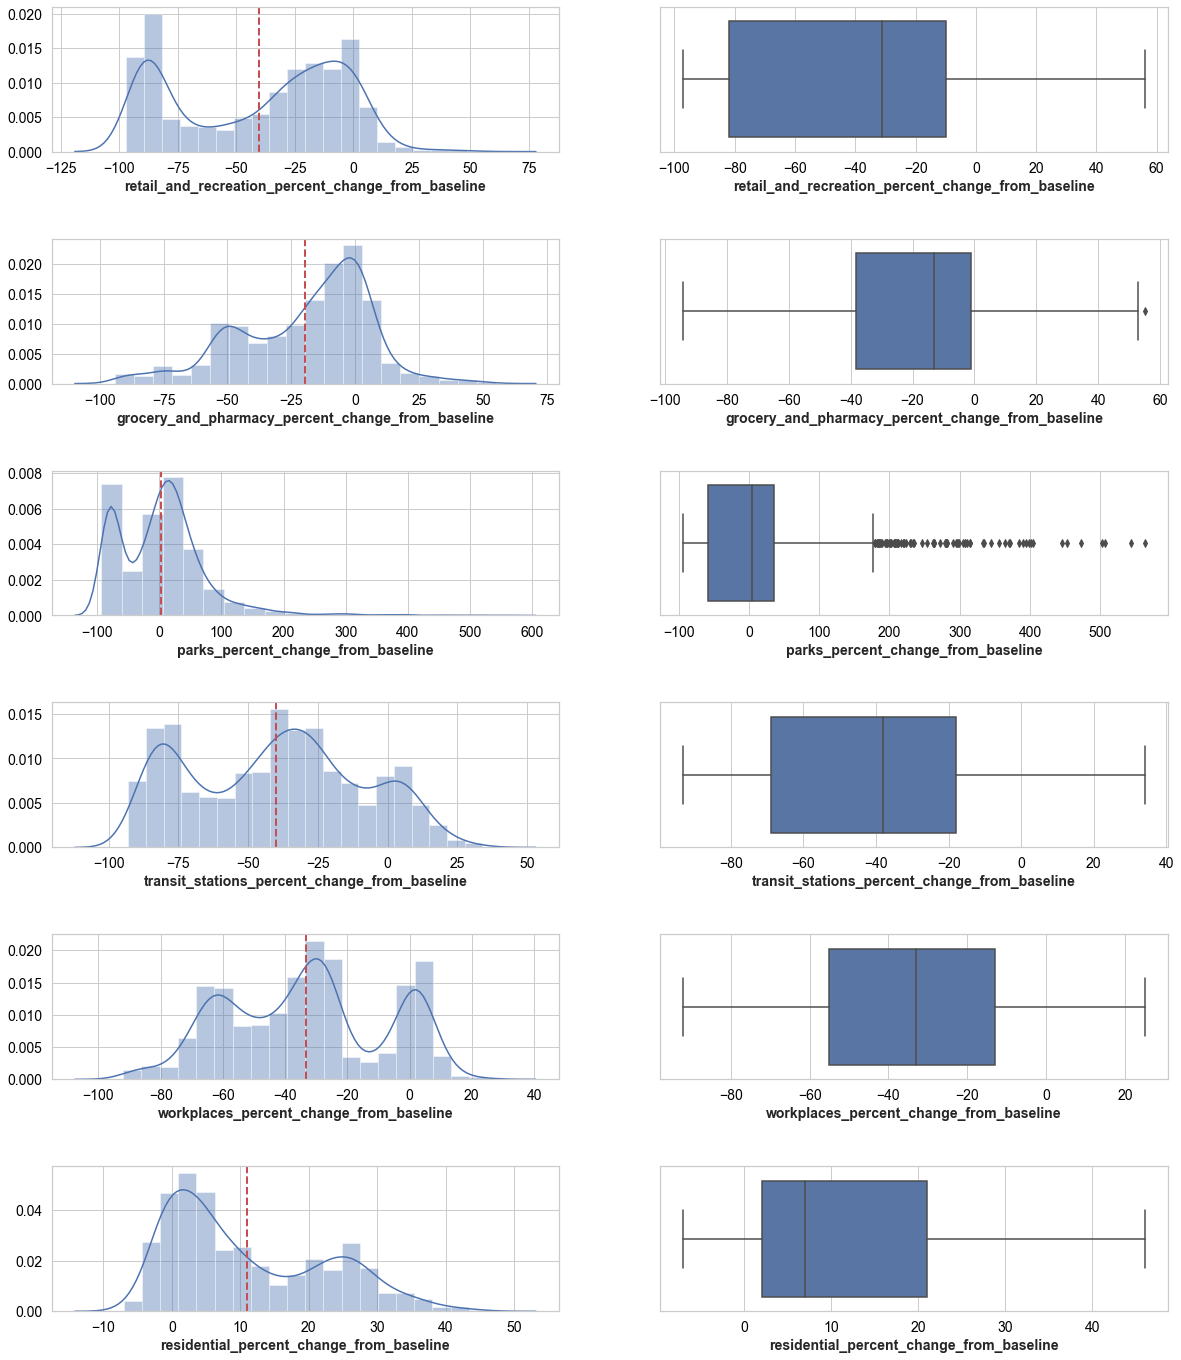

In [114]:
sns.set(style='whitegrid', color_codes=True)
cols_movilidad =['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']

fig= plt.figure(figsize=(20,24))
gs = fig.add_gridspec(6, 2,hspace=0.6)

ax=fig.add_subplot(gs[0,0])
sns.distplot(google[cols_movilidad[0]], bins = 20,ax=ax)
ax.axvline (google[cols_movilidad[0]].mean(), color='r',linestyle='dashed',linewidth=2)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[0], weight='bold', size=14)
ax=fig.add_subplot(gs[0,1])
sns.boxplot( google[cols_movilidad[0]],ax=ax)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[0], weight='bold', size=14)

ax=fig.add_subplot(gs[1,0])
sns.distplot(google[cols_movilidad[1]], bins = 20,ax=ax)
ax.axvline (google[cols_movilidad[1]].mean(), color='r',linestyle='dashed',linewidth=2)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[1], weight='bold', size=14)
ax=fig.add_subplot(gs[1,1])
sns.boxplot( google[cols_movilidad[1]],ax=ax)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[1], weight='bold', size=14)

ax=fig.add_subplot(gs[2,0])
sns.distplot(google[cols_movilidad[2]], bins = 20,ax=ax)
ax.axvline (google[cols_movilidad[2]].mean(), color='r',linestyle='dashed',linewidth=2)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[2], weight='bold', size=14)
ax=fig.add_subplot(gs[2,1])
sns.boxplot( google[cols_movilidad[2]],ax=ax)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[2], weight='bold', size=14)

ax=fig.add_subplot(gs[3,0])
sns.distplot(google[cols_movilidad[3]], bins = 20,ax=ax)
ax.axvline (google[cols_movilidad[3]].mean(), color='r',linestyle='dashed',linewidth=2)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[3], weight='bold', size=14)

ax=fig.add_subplot(gs[3,1])
sns.boxplot( google[cols_movilidad[3]],ax=ax)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[3], weight='bold', size=14)

ax=fig.add_subplot(gs[4,0])
sns.distplot(google[cols_movilidad[4]], bins = 20,ax=ax)
ax.axvline (google[cols_movilidad[4]].mean(), color='r',linestyle='dashed',linewidth=2)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[4], weight='bold', size=14)

ax=fig.add_subplot(gs[4,1])
sns.boxplot( google[cols_movilidad[4]],ax=ax)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[4], weight='bold', size=14)

ax=fig.add_subplot(gs[5,0])
sns.distplot(google[cols_movilidad[5]], bins = 20,ax=ax)
ax.axvline (google[cols_movilidad[5]].mean(), color='r',linestyle='dashed',linewidth=2)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[5], weight='bold', size=14)

ax=fig.add_subplot(gs[5,1])
sns.boxplot( google[cols_movilidad[5]],ax=ax)
ax.tick_params(axis='x', labelsize=14, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,  labelcolor='black')
ax.set_xlabel (cols_movilidad[5], weight='bold', size=14)


plt.savefig ('../imagenes/img01.jpg')

Visualización del conjunto de datos

Text(0.5, 1.0, 'Evolución de movilidad - workplaces_percent_change_from_baseline')

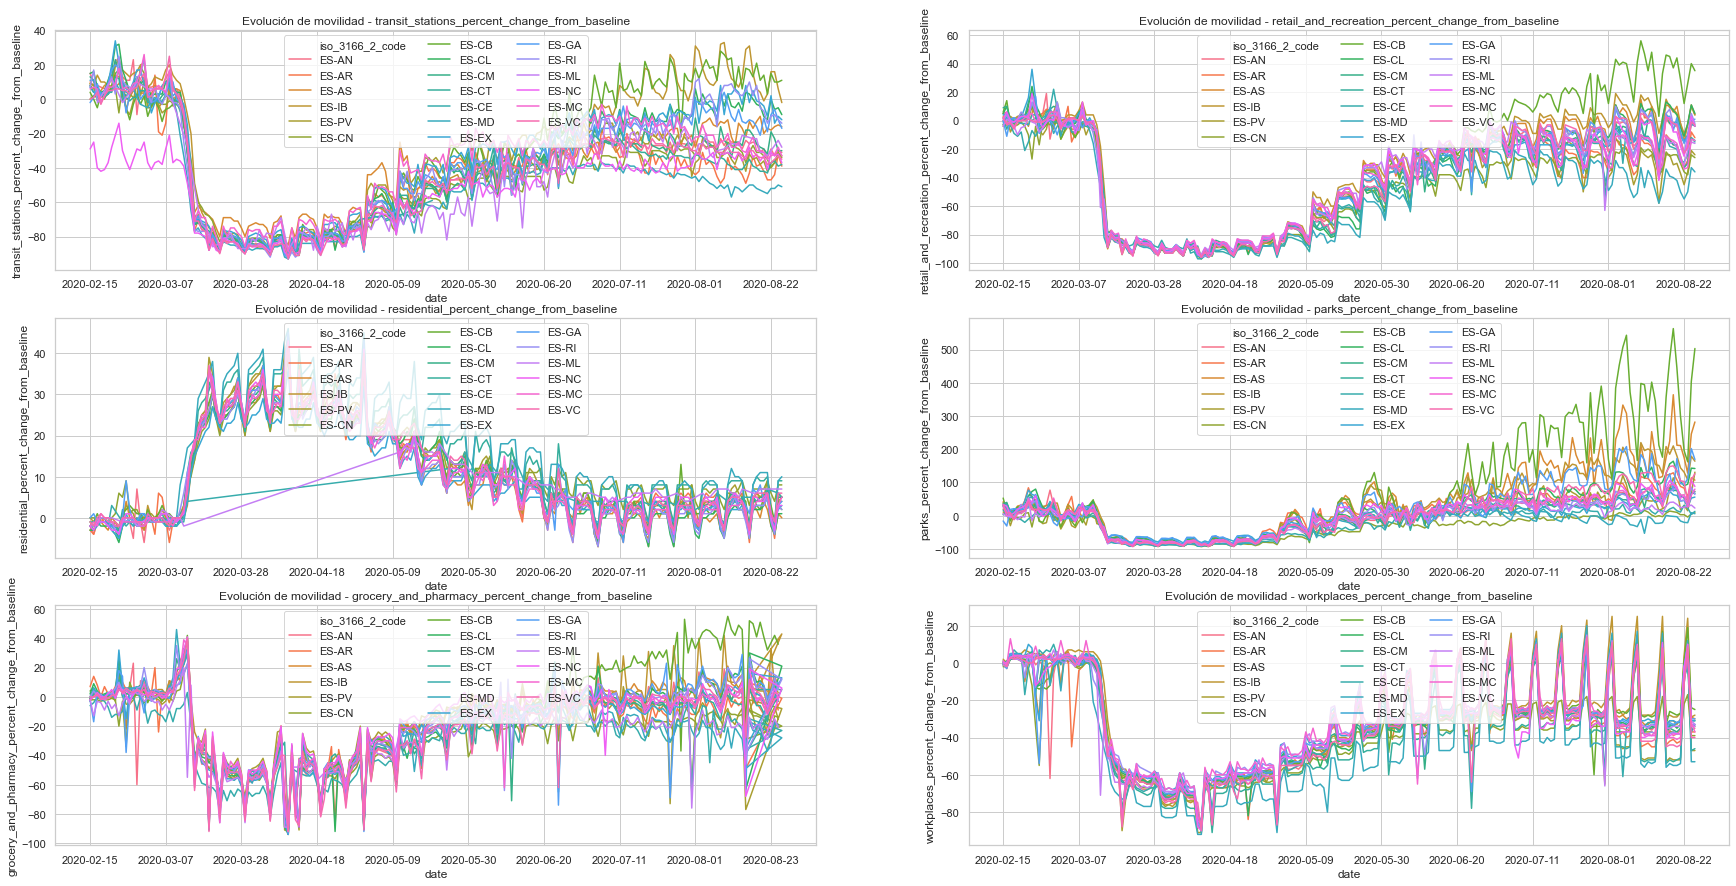

In [115]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))
# Plot the responses for different events and regions
locator=21
ax=plt.subplot(321)
sns.lineplot(x="date", y="transit_stations_percent_change_from_baseline",
             hue="iso_3166_2_code", 
             data=google)
ax.legend(ncol=3, loc="upper center", frameon=True)
ax.xaxis.set_major_locator(MultipleLocator(locator))
ax.set_title('Evolución de movilidad - transit_stations_percent_change_from_baseline')


ax=plt.subplot(322)
sns.lineplot(x="date", y="retail_and_recreation_percent_change_from_baseline",
             hue="iso_3166_2_code", 
             data=google)
ax.legend(ncol=3, loc="upper center", frameon=True)
ax.xaxis.set_major_locator(MultipleLocator(locator))
ax.set_title('Evolución de movilidad - retail_and_recreation_percent_change_from_baseline')

ax=plt.subplot(323)
sns.lineplot(x="date", y="residential_percent_change_from_baseline",
             hue="iso_3166_2_code", 
             data=google)
ax.legend(ncol=3, loc="upper center", frameon=True)
ax.xaxis.set_major_locator(MultipleLocator(locator))
ax.set_title('Evolución de movilidad - residential_percent_change_from_baseline')

ax=plt.subplot(324)
sns.lineplot(x="date", y="parks_percent_change_from_baseline",
             hue="iso_3166_2_code", 
             data=google)
ax.legend(ncol=3, loc="upper center", frameon=True)
ax.xaxis.set_major_locator(MultipleLocator(locator))
ax.set_title('Evolución de movilidad - parks_percent_change_from_baseline')

ax=plt.subplot(325)
sns.lineplot(x="date", y="grocery_and_pharmacy_percent_change_from_baseline",
             hue="iso_3166_2_code", 
             data=google)
ax.legend(ncol=3, loc="upper center", frameon=True)
ax.xaxis.set_major_locator(MultipleLocator(locator))
ax.set_title('Evolución de movilidad - grocery_and_pharmacy_percent_change_from_baseline')

ax=plt.subplot(326)
sns.lineplot(x="date", y="workplaces_percent_change_from_baseline",
             hue="iso_3166_2_code", 
             data=google)
ax.legend(ncol=3, loc="upper center", frameon=True)
ax.xaxis.set_major_locator(MultipleLocator(locator))
ax.set_title('Evolución de movilidad - workplaces_percent_change_from_baseline')

#sns.despine(left=True, bottom=True)

Visualización de evolución de la movilidad por Comunidad Autónoma

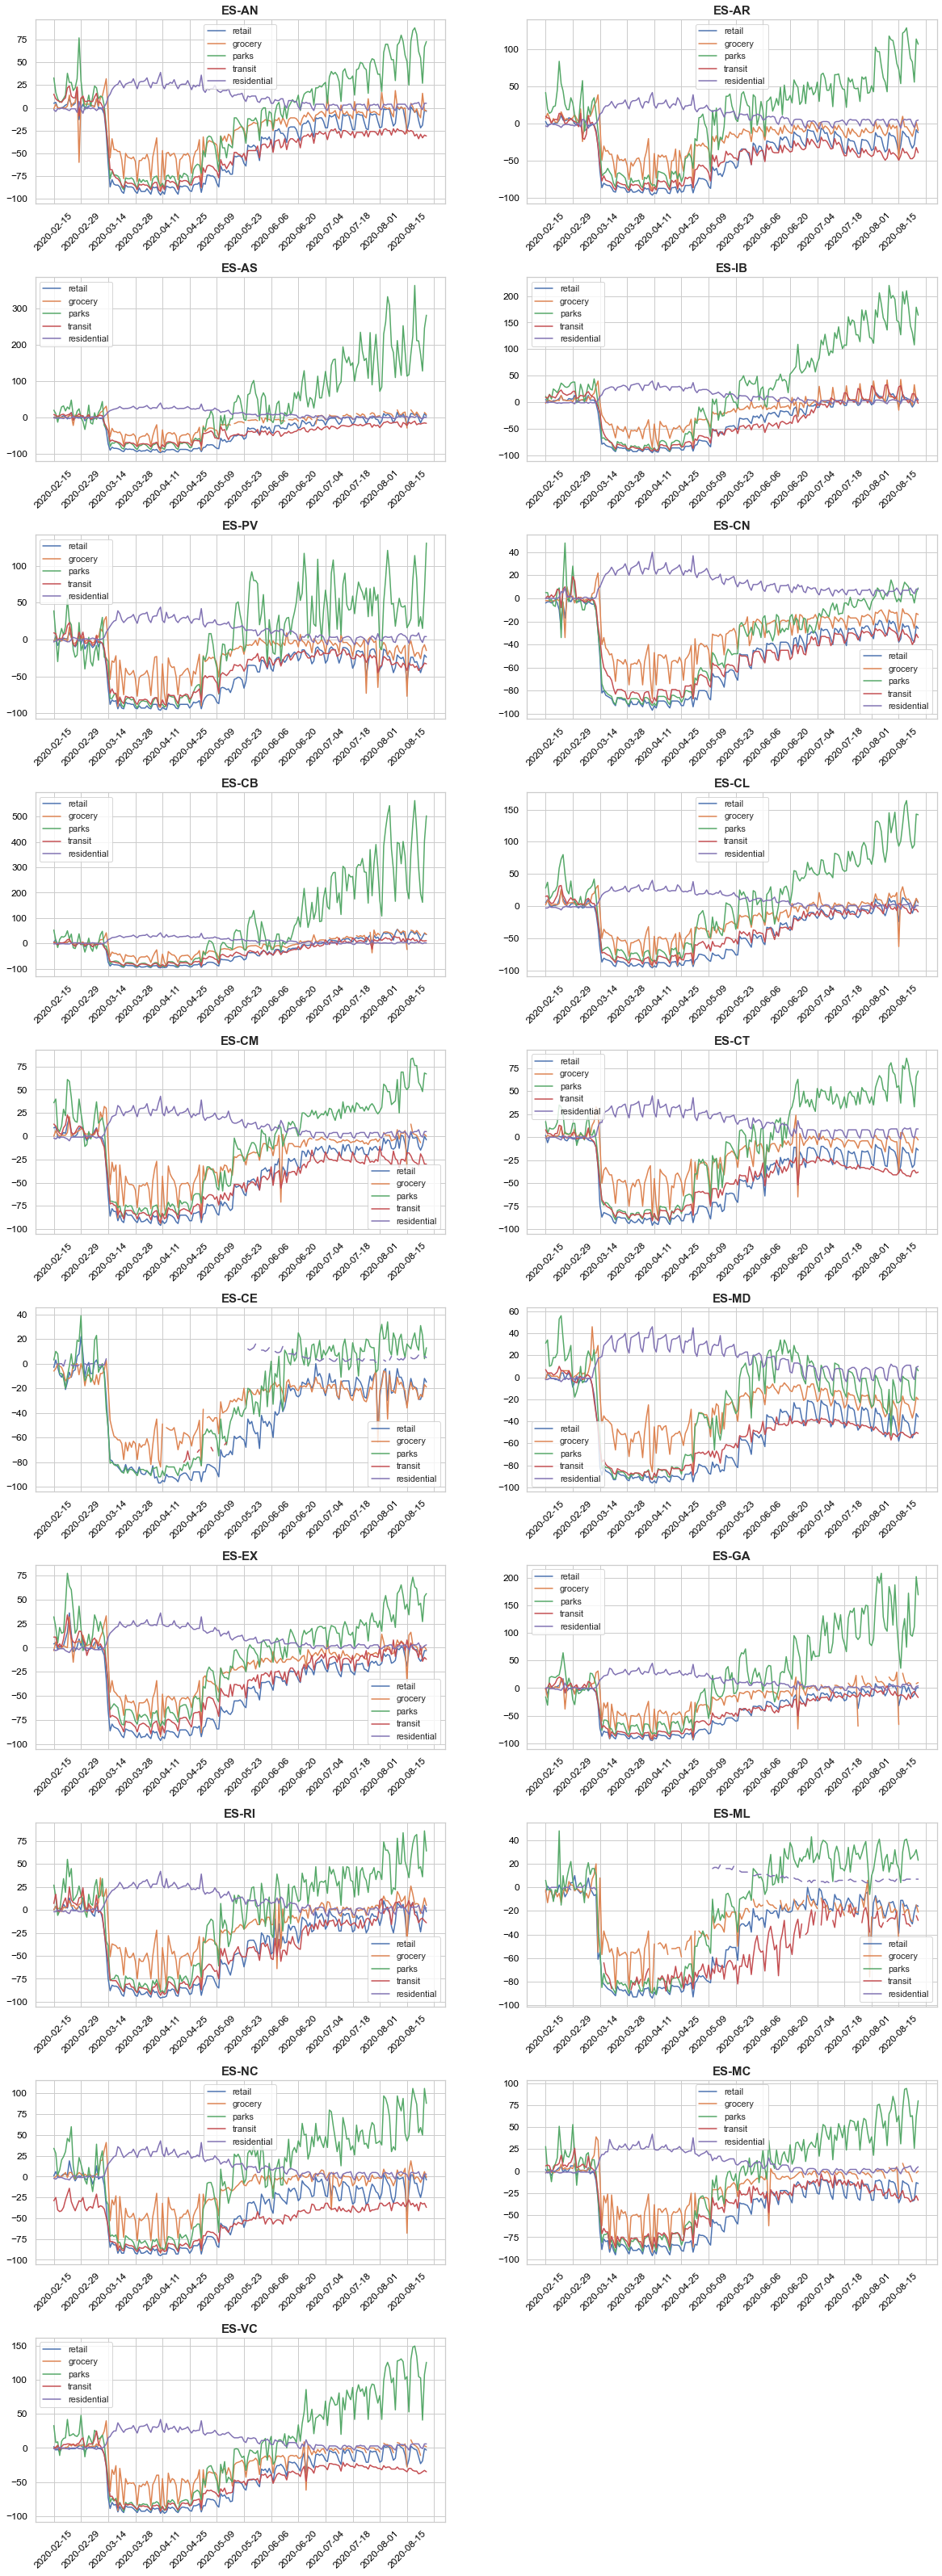

In [116]:
#Definimos la grid para representación

#Calculamos filas y columnas del Grid
df=google.copy()
n=df.iso_3166_2_code.nunique()
ncols=2
nfilas=math.ceil((n-ncols)/ncols)+1
fig= plt.figure(figsize=(20,3*n))
gs = fig.add_gridspec(nfilas, ncols,hspace=0.4)

nf,nc=0,0
col_ref='iso_3166_2_code'
for ca in df['iso_3166_2_code'].unique():
    ax=fig.add_subplot(gs[nf,nc])
    x = df[df['iso_3166_2_code']== ca]['date']
    y1 = df[df['iso_3166_2_code']== ca]['retail_and_recreation_percent_change_from_baseline']
    y2 = df[df['iso_3166_2_code']== ca]['grocery_and_pharmacy_percent_change_from_baseline']
    y3 = df[df['iso_3166_2_code']== ca]['parks_percent_change_from_baseline']
    y4 = df[df['iso_3166_2_code']== ca]['transit_stations_percent_change_from_baseline']
    y5 = df[df['iso_3166_2_code']== ca]['residential_percent_change_from_baseline']

    ax.plot (x, y1, label='retail')
    ax.plot (x, y2, label ='grocery')
    ax.plot (x, y3, label ='parks')
    ax.plot (x, y4, label ='transit')
    ax.plot (x, y5, label ='residential')
    ax.xaxis.set_major_locator(MultipleLocator(14))
    ax.tick_params(axis='x', labelsize=12, labelrotation=45, labelcolor='black')
    ax.tick_params(axis='y', labelsize=12,  labelcolor='black')
    
    ax.set_title ( ca,weight='bold', size=15 )
    ax.legend()
    if (nc == ncols-1): 
        nf=nf+1
        nc=0
    else:
        nc=nc+1
plt.savefig ('../imagenes/movilidad_por_ca.jpg')

Realizamos el mismo gráfico pero acotando a las últimas 3 semanas

Comprobación de valores faltantes por atributo

In [117]:
#Comprobación de valores faltantes. Detalle por campos
for ca in google['iso_3166_2_code'].unique():
    df= google.loc[google['iso_3166_2_code']== ca]
    total_nulos = pd.isnull(df).sum().sum()    
    if (total_nulos > 0):
        print('---- ' + ca + '-----')
        print ('---- Total nulos:'+ str(total_nulos))
        #print (df[pd.isnull(df).any(axis=1)])
        print (df.isnull().sum())
        #Interpolamos para rellenar faltantes
        #google.loc[google['ccaa_iso']== ca].interpolate(method='linear', limit_direction='forward', inplace=True)

---- ES-AN-----
---- Total nulos:580
country_region_code                                     0
country_region                                          0
sub_region_1                                            0
sub_region_2                                          193
metro_area                                            193
iso_3166_2_code                                         0
census_fips_code                                      193
date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       1
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
dtype: int64
---- ES-AR-----
---- Total nulos:579
country_region_code                                     0
country_region                             

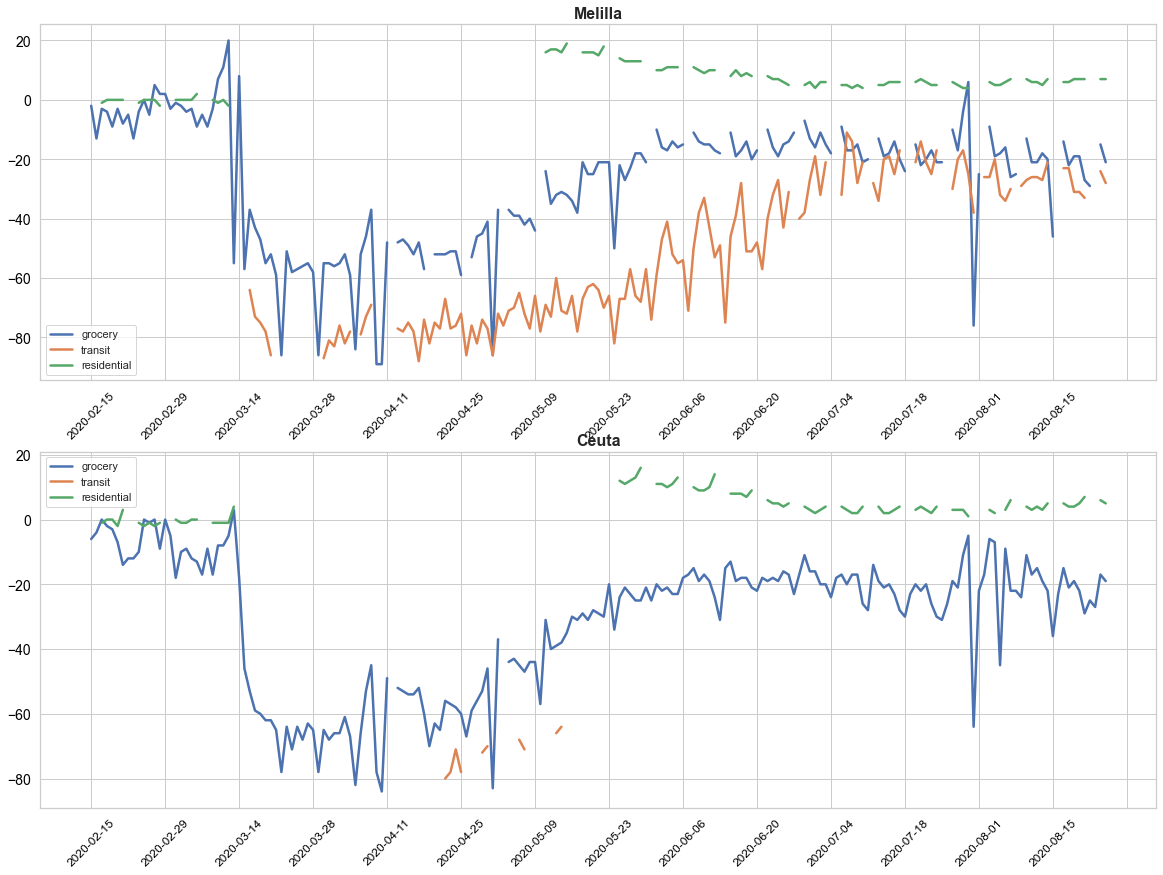

In [118]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig=plt.figure(figsize=(20,16))
fig.autofmt_xdate()
ax=plt.subplot(211)
df=google[google['iso_3166_2_code']=='ES-ML']
ax.plot (df.date, df.grocery_and_pharmacy_percent_change_from_baseline, label='grocery',linewidth=2.5) 
ax.plot (df.date, df.transit_stations_percent_change_from_baseline, label='transit',linewidth=2.5)
ax.plot (df.date, df.residential_percent_change_from_baseline, label='residential',linewidth=2.5)
ax.tick_params(axis='x', labelsize=12, labelrotation=45, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,labelcolor='black')
ax.xaxis.set_major_locator(MultipleLocator(14))
ax.set_title('Melilla', weight='bold', size=16)
ax.legend()

ax=plt.subplot(212)
df=google[google['iso_3166_2_code']=='ES-CE']
ax.plot (df.date, df.grocery_and_pharmacy_percent_change_from_baseline, label='grocery',linewidth=2.5) 
ax.plot (df.date, df.transit_stations_percent_change_from_baseline, label='transit',linewidth=2.5)
ax.plot (df.date, df.residential_percent_change_from_baseline, label='residential',linewidth=2.5)
ax.tick_params(axis='x', labelsize=12, labelrotation=45, labelcolor='black')
ax.tick_params(axis='y', labelsize=14, labelcolor='black')
ax.xaxis.set_major_locator(MultipleLocator(14))
ax.set_title('Ceuta', weight='bold', size=16)
ax.legend()

#ax=plt.subplot(223)
#df=google[google['iso_3166_2_code']=='ES-AN']
#ax.plot (df.date, df.grocery_and_pharmacy_percent_change_from_baseline, label='grocery') 
#ax.plot (df.date, df.transit_stations_percent_change_from_baseline, label='transit')
#ax.plot (df.date, df.residential_percent_change_from_baseline, label='residential')
#ax.tick_params(axis='x', labelsize=12, labelrotation=45, labelcolor='black')
#ax.tick_params(axis='y', labelsize=14, labelcolor='black')
#ax.xaxis.set_major_locator(MultipleLocator(14))
#ax.set_title('Andalucía', weight='bold', size=16)
#ax.legend()

#ax=plt.subplot(224)
#df=google[google['iso_3166_2_code']=='ES-AS']
#ax.plot (df.date, df.grocery_and_pharmacy_percent_change_from_baseline, label='grocery') 
#ax.plot (df.date, df.transit_stations_percent_change_from_baseline, label='transit')
#ax.plot (df.date, df.residential_percent_change_from_baseline, label='residential')
#ax.tick_params(axis='x', labelsize=12, labelrotation=45, labelcolor='black')
#ax.tick_params(axis='y', labelsize=14, labelcolor='black')
#ax.xaxis.set_major_locator(MultipleLocator(14))
#ax.set_title('Asturias', weight='bold', size=16)
#ax.legend()
plt.savefig('../imagenes/missing_values.jpg')

In [119]:
#google.interpolate(method='linear', limit_direction='backward', inplace=True)  
google.interpolate(method='linear', inplace=True)  

In [120]:
google.isna().sum()

country_region_code                                      0
country_region                                           0
sub_region_1                                             0
sub_region_2                                          3667
metro_area                                            3667
iso_3166_2_code                                          0
census_fips_code                                      3667
date                                                     0
retail_and_recreation_percent_change_from_baseline       0
grocery_and_pharmacy_percent_change_from_baseline        0
parks_percent_change_from_baseline                       0
transit_stations_percent_change_from_baseline            0
workplaces_percent_change_from_baseline                  0
residential_percent_change_from_baseline                 0
dtype: int64

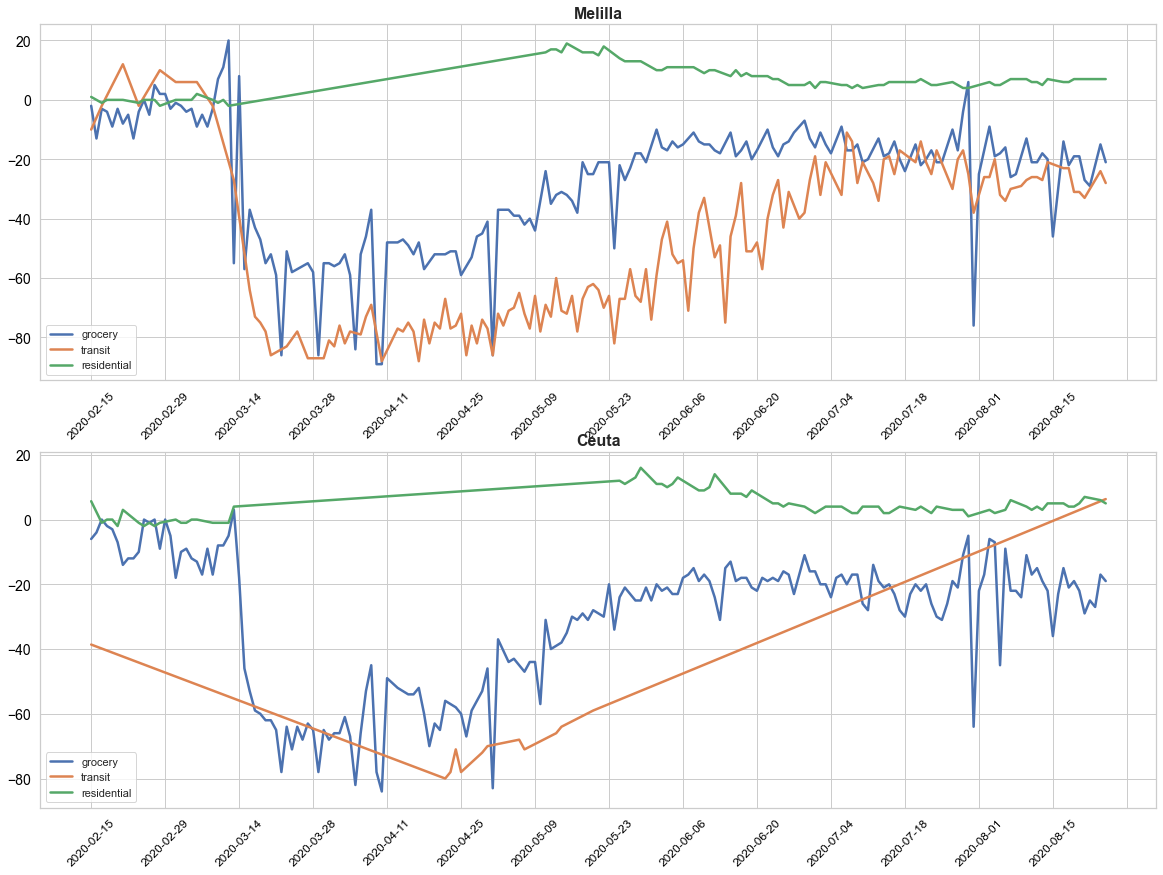

In [121]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig=plt.figure(figsize=(20,16))
fig.autofmt_xdate()
ax=plt.subplot(211)
df=google[google['iso_3166_2_code']=='ES-ML']
ax.plot (df.date, df.grocery_and_pharmacy_percent_change_from_baseline, label='grocery',linewidth=2.5) 
ax.plot (df.date, df.transit_stations_percent_change_from_baseline, label='transit',linewidth=2.5)
ax.plot (df.date, df.residential_percent_change_from_baseline, label='residential',linewidth=2.5)
ax.tick_params(axis='x', labelsize=12, labelrotation=45, labelcolor='black')
ax.tick_params(axis='y', labelsize=14,labelcolor='black')
ax.xaxis.set_major_locator(MultipleLocator(14))
ax.set_title('Melilla', weight='bold', size=16)
ax.legend()

ax=plt.subplot(212)
df=google[google['iso_3166_2_code']=='ES-CE']
ax.plot (df.date, df.grocery_and_pharmacy_percent_change_from_baseline, label='grocery',linewidth=2.5) 
ax.plot (df.date, df.transit_stations_percent_change_from_baseline, label='transit',linewidth=2.5)
ax.plot (df.date, df.residential_percent_change_from_baseline, label='residential',linewidth=2.5)
ax.tick_params(axis='x', labelsize=12, labelrotation=45, labelcolor='black')
ax.tick_params(axis='y', labelsize=14, labelcolor='black')
ax.xaxis.set_major_locator(MultipleLocator(14))
ax.set_title('Ceuta', weight='bold', size=16)
ax.legend()



## Dataset de casos de COVID-19

In [122]:
covid = pd.read_csv('../datasets/raw_data/casos_covid.csv', ',', index_col='Unnamed: 0')
covid.shape

(3914, 7)

In [123]:
covid.describe()

num_casos  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
count  3914.000000           3914.000000               3914.000000   
mean    112.397036            101.177057                  5.338017   
std     274.010784            265.607762                 20.937446   
min       0.000000              0.000000                  0.000000   
25%       2.000000              2.000000                  0.000000   
50%      14.000000             12.000000                  0.000000   
75%      93.750000             76.000000                  0.000000   
max    3472.000000           3472.000000                286.000000   

       num_casos_prueba_otras  num_casos_prueba_desconocida  
count             3914.000000                   3914.000000  
mean                 0.454778                      5.427184  
std                  3.624620                     36.648696  
min                  0.000000                      0.000000  
25%                  0.000000                      0.000000  
50%                  0.000000                      0.000000  
75%                  0.000000                      0.000000  
max                 72.000000                    612.000000

In [124]:
covid.groupby('ccaa_iso')['num_casos'].describe().sort_values('mean')

count        mean         std  min    25%    50%     75%     max
ccaa_iso                                                                  
ML        206.0    1.383495    2.505315  0.0   0.00    0.0    2.00    14.0
CE        206.0    1.436893    2.291745  0.0   0.00    0.0    2.00    12.0
AS        206.0   15.388350   23.538959  0.0   0.00    3.0   23.00   106.0
CB        206.0   17.436893   27.114633  0.0   1.00    3.0   26.00   177.0
RI        206.0   24.975728   40.596220  0.0   1.00    4.0   29.00   191.0
CN        206.0   27.106796   46.731806  0.0   2.00    6.0   26.00   209.0
MC        206.0   27.456311   38.138586  0.0   2.00    6.5   44.75   160.0
EX        206.0   34.470874   42.558844  0.0   4.00   13.0   58.75   245.0
IB        206.0   36.563107   66.899440  0.0   3.00    7.0   36.00   331.0
NC        206.0   55.762136   69.048917  0.0   4.00   23.0   87.75   328.0
GA        206.0   69.077670   96.087378  0.0   3.00   17.0  108.75   470.0
VC        206.0  120.665049  148.334459  0.0   9.00   41.0  187.50   635.0
AR        206.0  122.495146  164.935634  0.0   8.25   42.5  163.75   842.0
CM        206.0  127.563107  197.330263  0.0  12.00   32.0  149.25   935.0
PV        206.0  132.917476  173.381964  0.0   9.00   40.5  218.25   698.0
AN        206.0  143.543689  184.314566  0.0   9.00   49.5  217.50   795.0
CL        206.0  161.718447  217.326367  0.0  13.00   35.0  264.50   955.0
CT        206.0  476.640777  473.652509  0.0  91.00  241.0  949.75  1896.0
MD        206.0  538.941748  761.327920  2.0  57.00  144.0  707.50  3472.0

In [125]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 0 to 3913
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ccaa_iso                      3914 non-null   object
 1   fecha                         3914 non-null   object
 2   num_casos                     3914 non-null   int64 
 3   num_casos_prueba_pcr          3914 non-null   int64 
 4   num_casos_prueba_test_ac      3914 non-null   int64 
 5   num_casos_prueba_otras        3914 non-null   int64 
 6   num_casos_prueba_desconocida  3914 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 244.6+ KB


In [126]:
covid.ccaa_iso.unique()

array(['AN', 'AR', 'AS', 'CB', 'CE', 'CL', 'CM', 'CN', 'CT', 'EX', 'GA',
       'IB', 'MC', 'MD', 'ML', 'NC', 'PV', 'RI', 'VC'], dtype=object)

In [127]:
covid.ccaa_iso.nunique()

19

In [128]:
covid.isna().sum()

ccaa_iso                        0
fecha                           0
num_casos                       0
num_casos_prueba_pcr            0
num_casos_prueba_test_ac        0
num_casos_prueba_otras          0
num_casos_prueba_desconocida    0
dtype: int64

In [129]:
covid['ccaa_iso'].value_counts()

AS    206
ML    206
CE    206
EX    206
PV    206
CL    206
CN    206
RI    206
VC    206
AR    206
MD    206
AN    206
GA    206
CT    206
CM    206
NC    206
IB    206
MC    206
CB    206
Name: ccaa_iso, dtype: int64

In [130]:
covid['fecha'].value_counts()

2020-06-20    19
2020-07-11    19
2020-03-31    19
2020-03-06    19
2020-05-25    19
              ..
2020-07-16    19
2020-07-20    19
2020-03-23    19
2020-07-10    19
2020-07-21    19
Name: fecha, Length: 206, dtype: int64

In [131]:
#Rango de fechas del dataset
min_fecha_covid=covid.fecha.min()
max_fecha_covid=covid.fecha.max()

print ("Rango fechas dataset COVID:      " + str (min_fecha_covid) + " a " + str (max_fecha_covid))

Rango fechas dataset COVID:      2020-01-31 a 2020-08-23


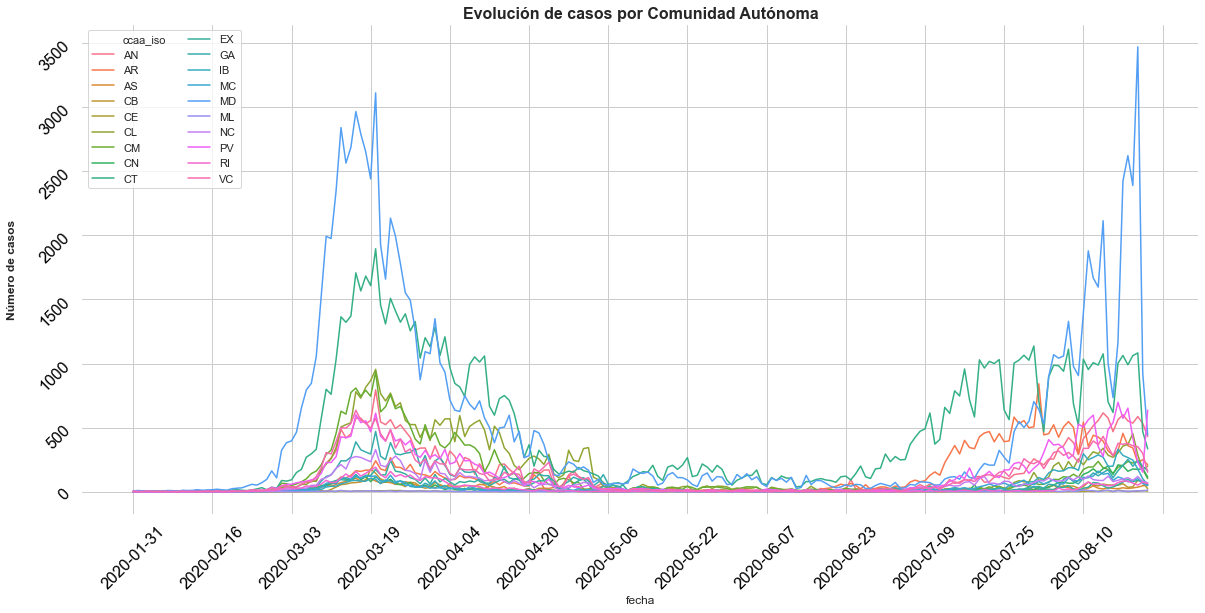

In [132]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))
# Plot the responses for different events and regions
sns.lineplot(x="fecha", y="num_casos",
             hue="ccaa_iso", 
             data=covid)
ax.tick_params(axis='x', labelsize=16, labelrotation=45, labelcolor='black')
ax.tick_params(axis='y', labelsize=16, labelrotation=45, labelcolor='black')
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.xaxis.set_major_locator(MultipleLocator(16))
ax.set_ylabel ('Número de casos', labelpad=20, weight='bold', size=12)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

        
ax.set_title('Evolución de casos por Comunidad Autónoma', weight='bold', size=16)
sns.despine(left=True, bottom=True)

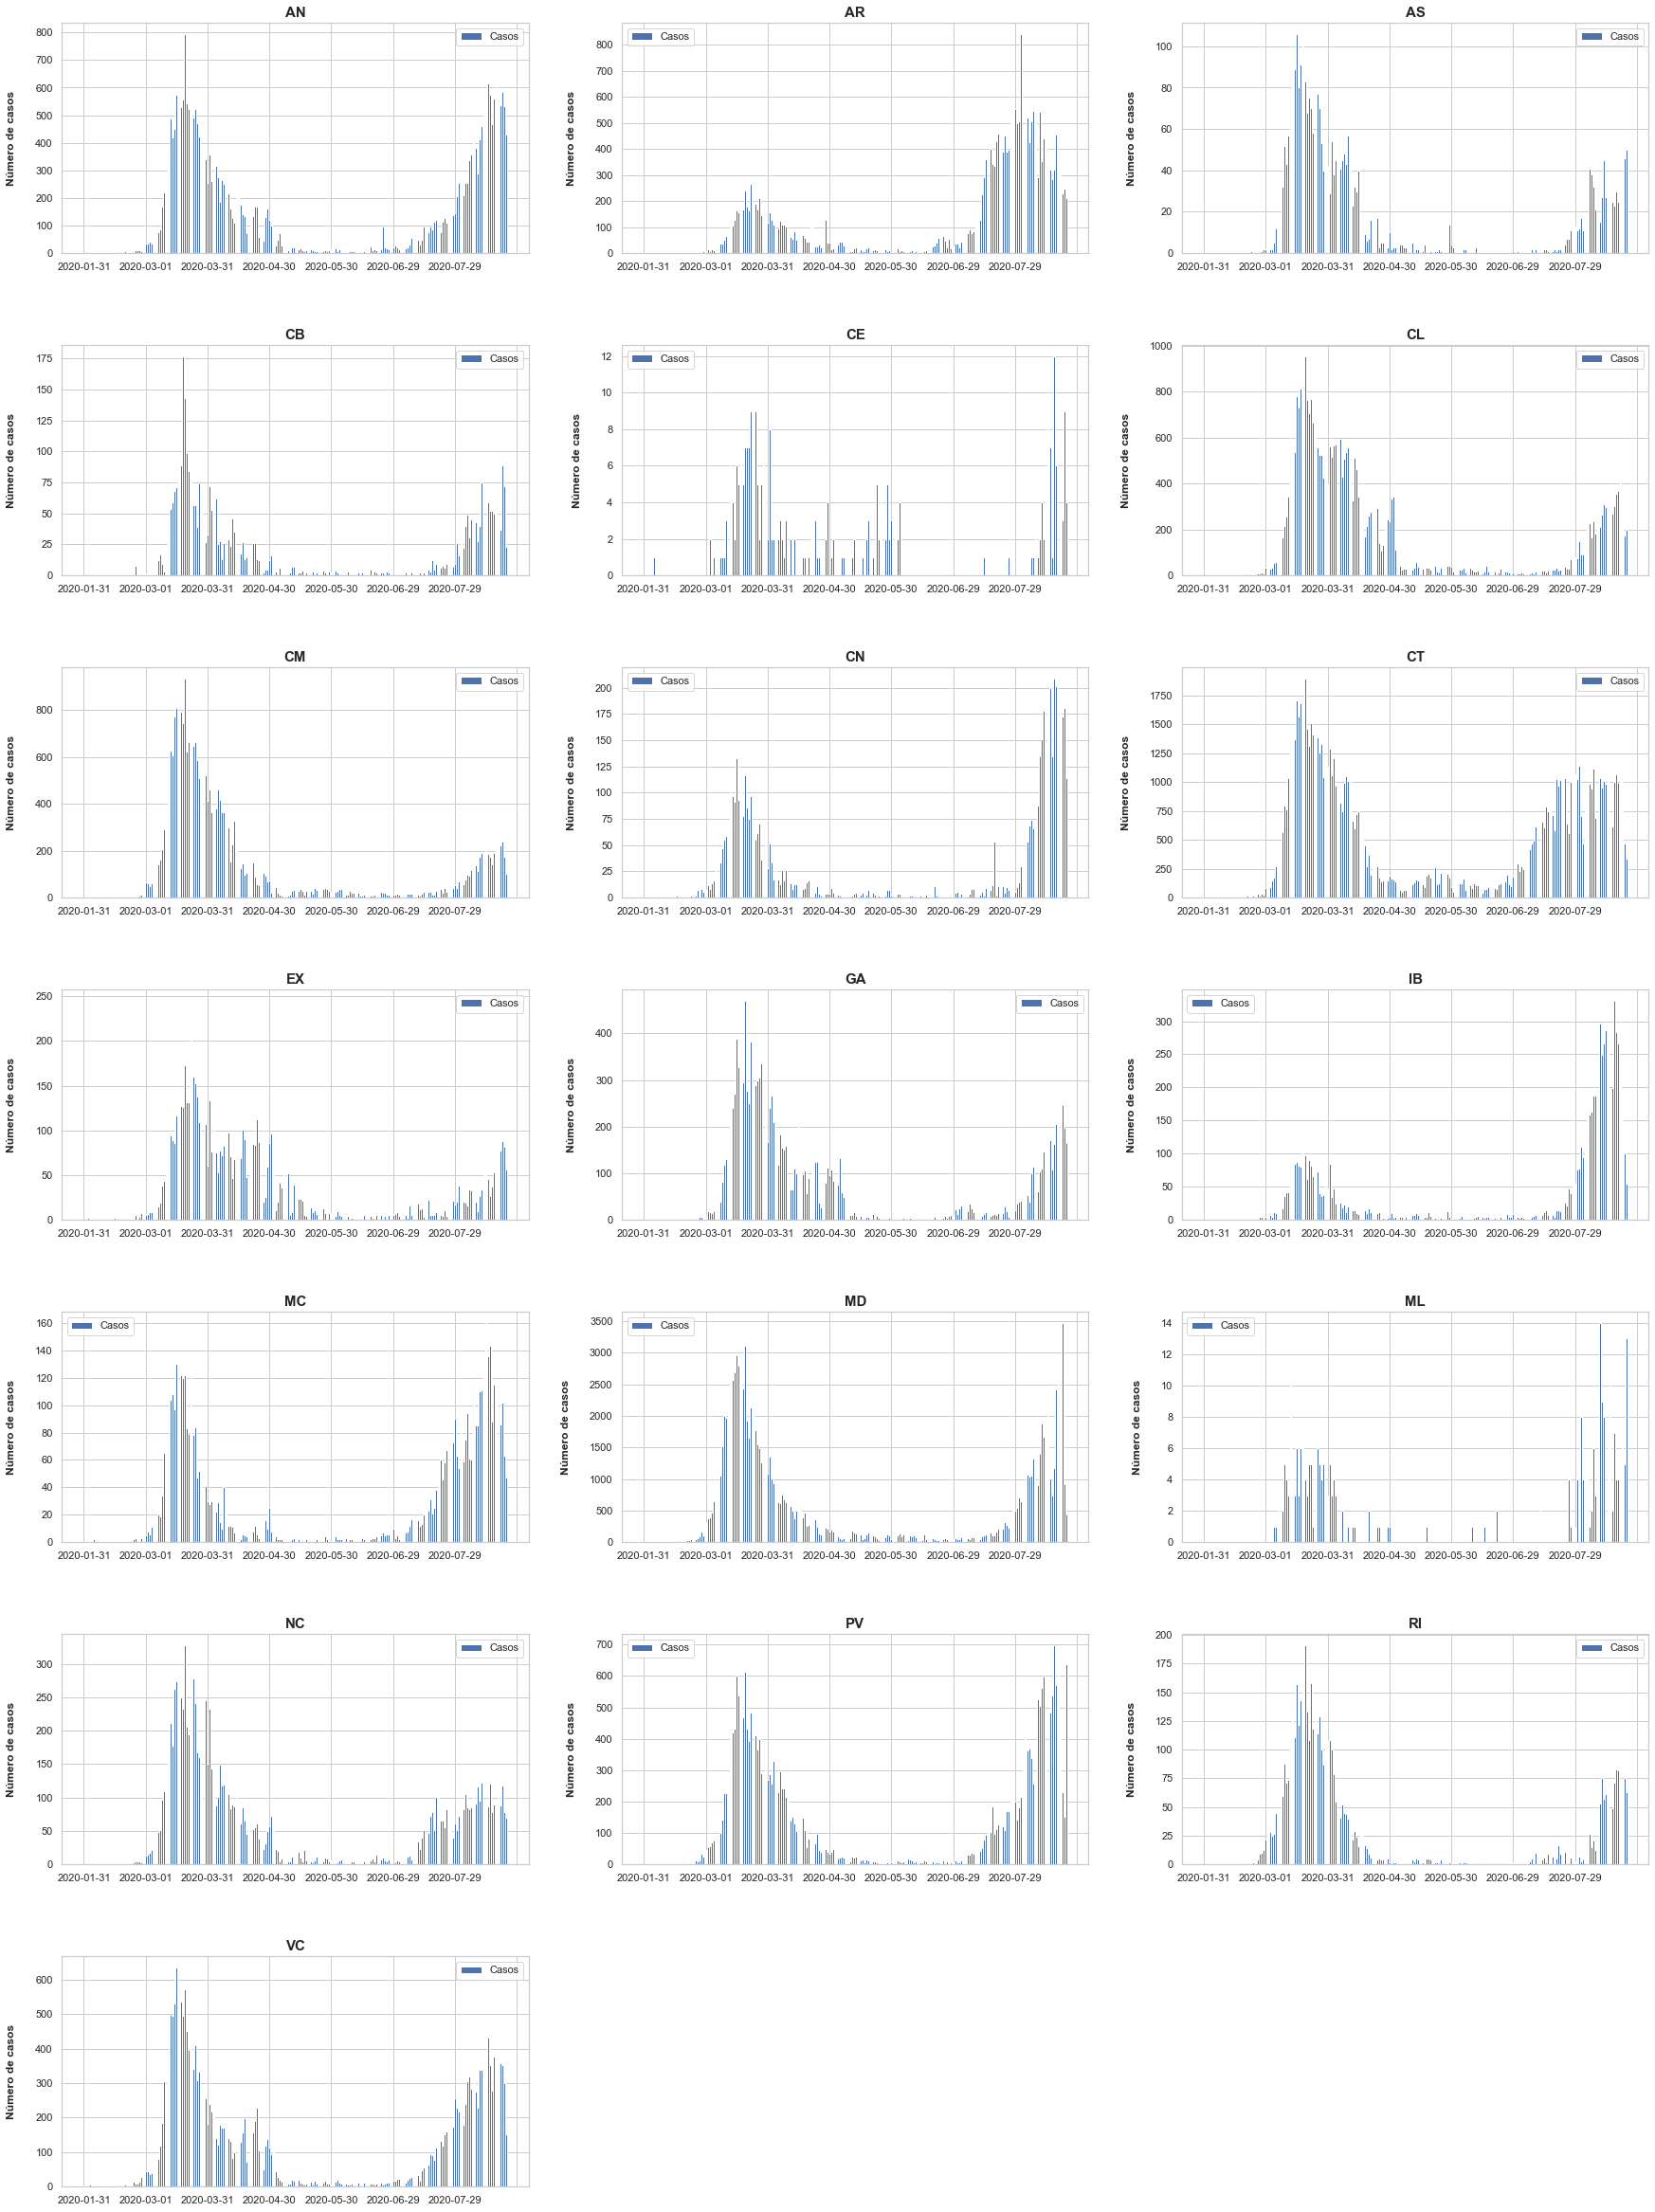

In [133]:
#Calculamos filas y columnas del Grid
n=covid.ccaa_iso.nunique()
ncols=3
nfilas=math.ceil((n-ncols)/ncols)+1

#Definimos la grid para representación
fig= plt.figure(figsize=(30,42))
gs = fig.add_gridspec(nfilas, ncols,hspace=0.4)

nf,nc=0,0
for ca in covid['ccaa_iso'].unique():
    ax=fig.add_subplot(gs[nf,nc])
    df=covid[covid['ccaa_iso']==ca]
    ax.bar(df['fecha'], df['num_casos'], label= 'Casos')
    ax.xaxis.set_major_locator(MultipleLocator(30))
    ax.set_ylabel ('Número de casos', labelpad=20, weight='bold', size=12)
    ax.set_title ( ca, weight='bold', size=15)
    ax.legend()
    if (nc == ncols-1): 
        nf=nf+1
        nc=0
    else:
        nc=nc+1
plt.savefig ('../imagenes/ev_covid_por_ca.jpg')

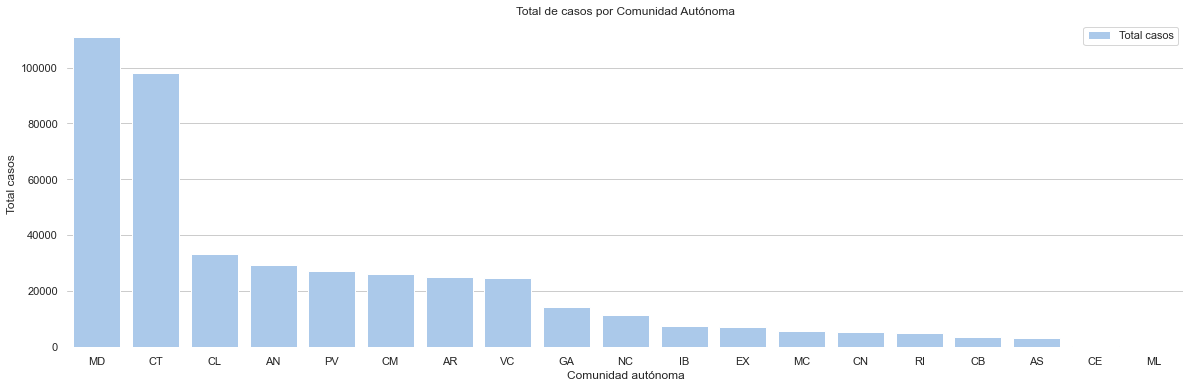

In [134]:
#VISUALIZACIÓN TOTAL CASOS POR COMUNIDAD AUTÓNOMA
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 6))

# Creamos los datos
casos_ccaa = covid.groupby(['ccaa_iso']).agg({'num_casos':['sum']})#.rename('total_cases')
casos_ccaa.reset_index(inplace=True)
casos_ccaa=casos_ccaa.sort_values([('num_casos','sum')],ascending=False)

sns.set_color_codes("pastel")
sns.barplot(x=casos_ccaa.iloc[:,0], y=casos_ccaa.iloc[:,1],data=casos_ccaa, 
            label="Total casos", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set( ylabel="Total casos",
       xlabel="Comunidad autónoma")
ax.set_title('Total de casos por Comunidad Autónoma')
sns.despine(left=True, bottom=True)

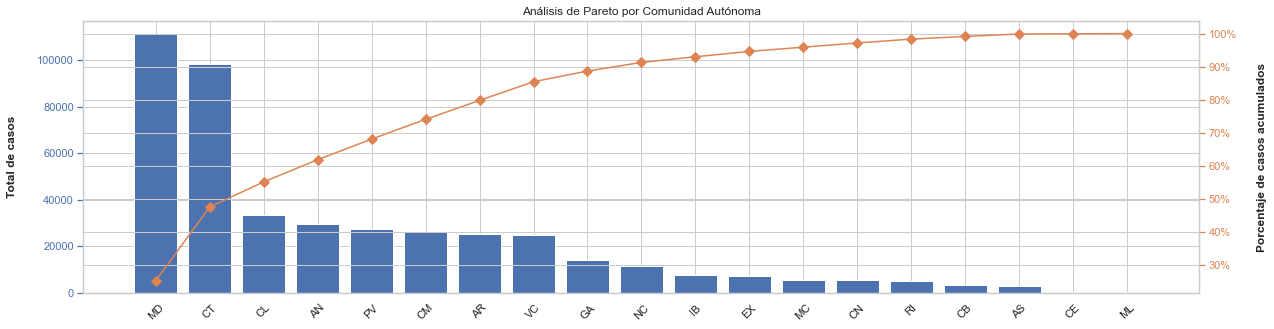

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def _plot_pareto_by(df_, group_by, column):

    df = df_.groupby(group_by)[column].sum().reset_index()
    df = df.sort_values(by=column,ascending=False)

    df["porcentaje_acumulado"] = df[column].cumsum()/df[column].sum()*100


    fig, ax = plt.subplots(figsize=(20,5))
    ax.bar(df[group_by], df[column], color="C0")
    ax.set_ylabel("Total de casos", labelpad=20, weight='bold', size=12)
    ax2 = ax.twinx()
    ax2.plot(df[group_by], df["porcentaje_acumulado"], color="C1", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.set_ylabel("Porcentaje de casos acumulados", labelpad=20, weight='bold', size=12)

    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    plt.title ('Análisis de Pareto por Comunidad Autónoma')
    plt.show()
_plot_pareto_by (covid, 'ccaa_iso','num_casos')

Text(0.5, 1.0, 'Boxplot')

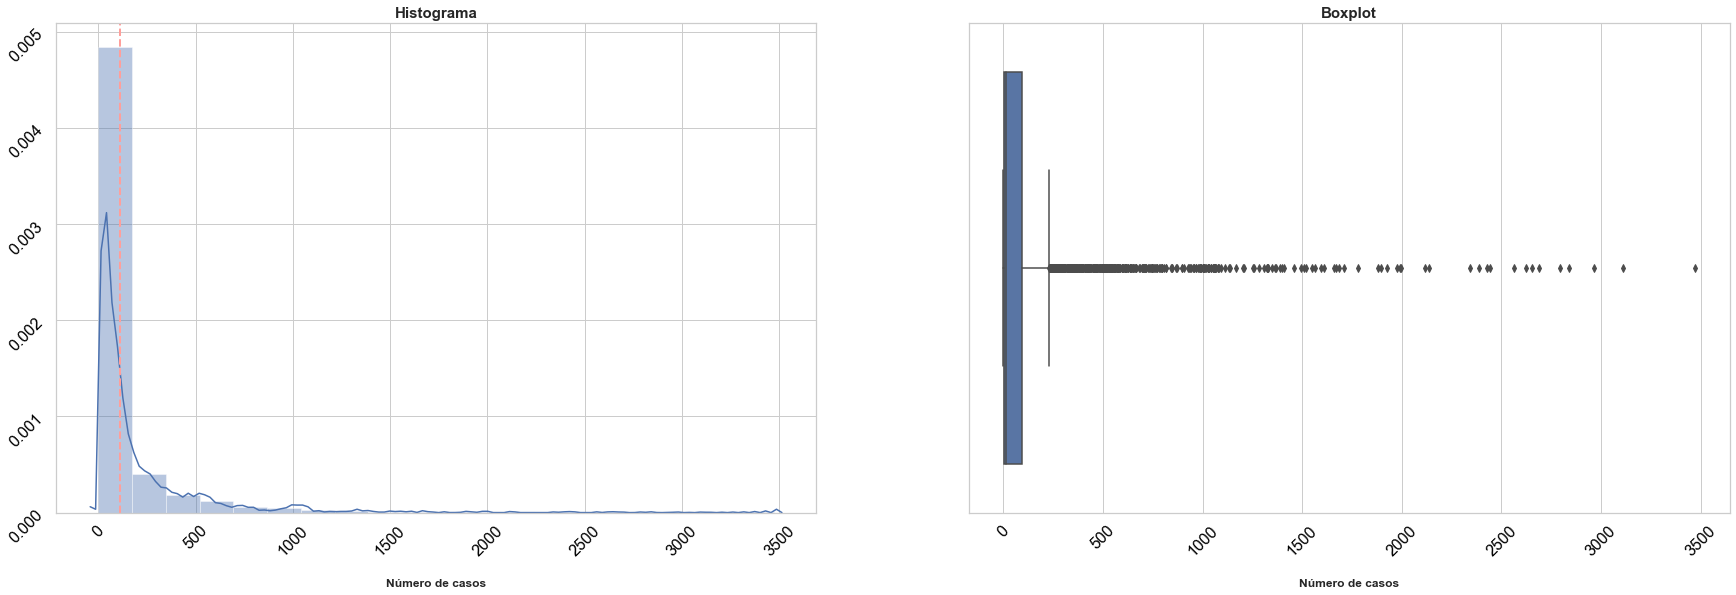

In [218]:
fig= plt.figure(figsize=(30,9))
gs = fig.add_gridspec(1, 2)
nf,nc=0,0
ax=fig.add_subplot(gs[nf,nc])
#ax.hist( covid['num_casos'])
#sns.displot(penguins, x="flipper_length_mm")

sns.distplot(covid['num_casos'], bins = 20,ax=ax)
ax.axvline (covid['num_casos'].mean(), color='r',linestyle='dashed',linewidth=2)
ax.set_xlabel ('Número de casos', labelpad=20, weight='bold', size=12)
ax.set_title ( 'Histograma', weight='bold', size=15)
ax.tick_params(axis='x', labelsize=16, labelrotation=45, labelcolor='black')
ax.tick_params(axis='y', labelsize=16, labelrotation=45, labelcolor='black')
nf,nc=0,1
ax=fig.add_subplot(gs[nf,nc])
sns.boxplot( covid['num_casos'],ax=ax)
ax.set_xlabel ('Número de casos', labelpad=20, weight='bold', size=12)
ax.tick_params(axis='x', labelsize=16, labelrotation=45, labelcolor='black')
ax.tick_params(axis='y', labelsize=16, labelrotation=45, labelcolor='black')
#sns.violinplot (covid['num_casos'],ax=ax)
#ax.set_xlabel("Casos diarios", labelpad=20, weight='bold', size=12)
ax.set_title ( 'Boxplot', weight='bold', size=15)

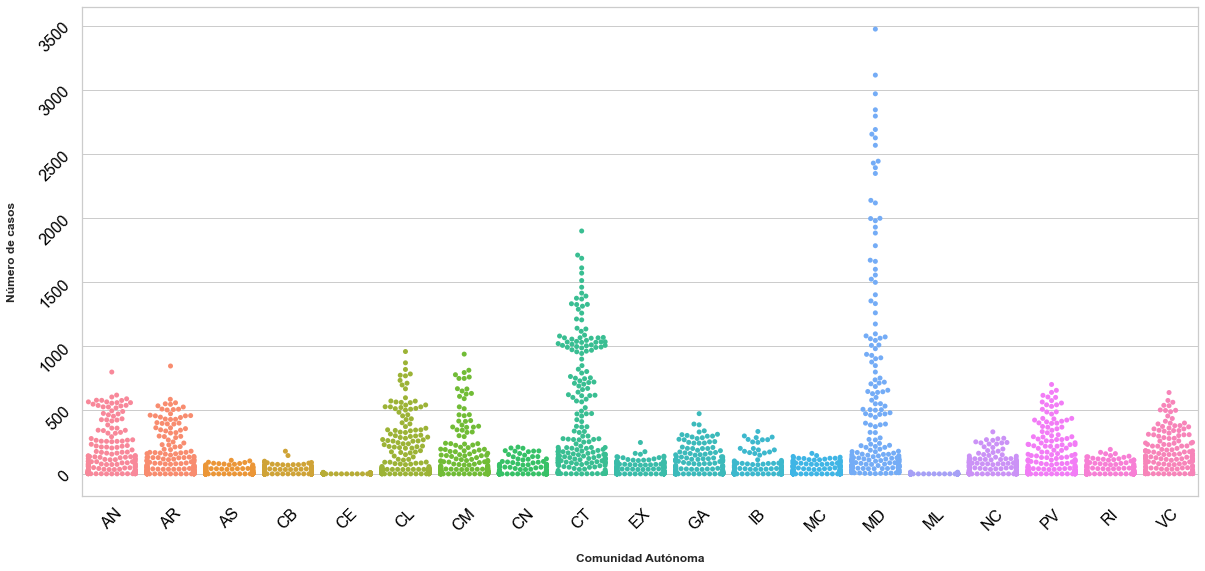

In [137]:
fig,ax= plt.subplots(figsize=(20,9))
#sns.stripplot (y = covid ['num_casos'], x = covid ['ccaa_iso'])
sns.swarmplot (y = covid ['num_casos'], x = covid ['ccaa_iso'], ax=ax)
ax.tick_params(axis='x', labelsize=16, labelrotation=45, labelcolor='black')
ax.tick_params(axis='y', labelsize=16, labelrotation=45, labelcolor='black')

ax.set_ylabel ('Número de casos', labelpad=20, weight='bold', size=12)
ax.set_xlabel ('Comunidad Autónoma', labelpad=20, weight='bold', size=12)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)


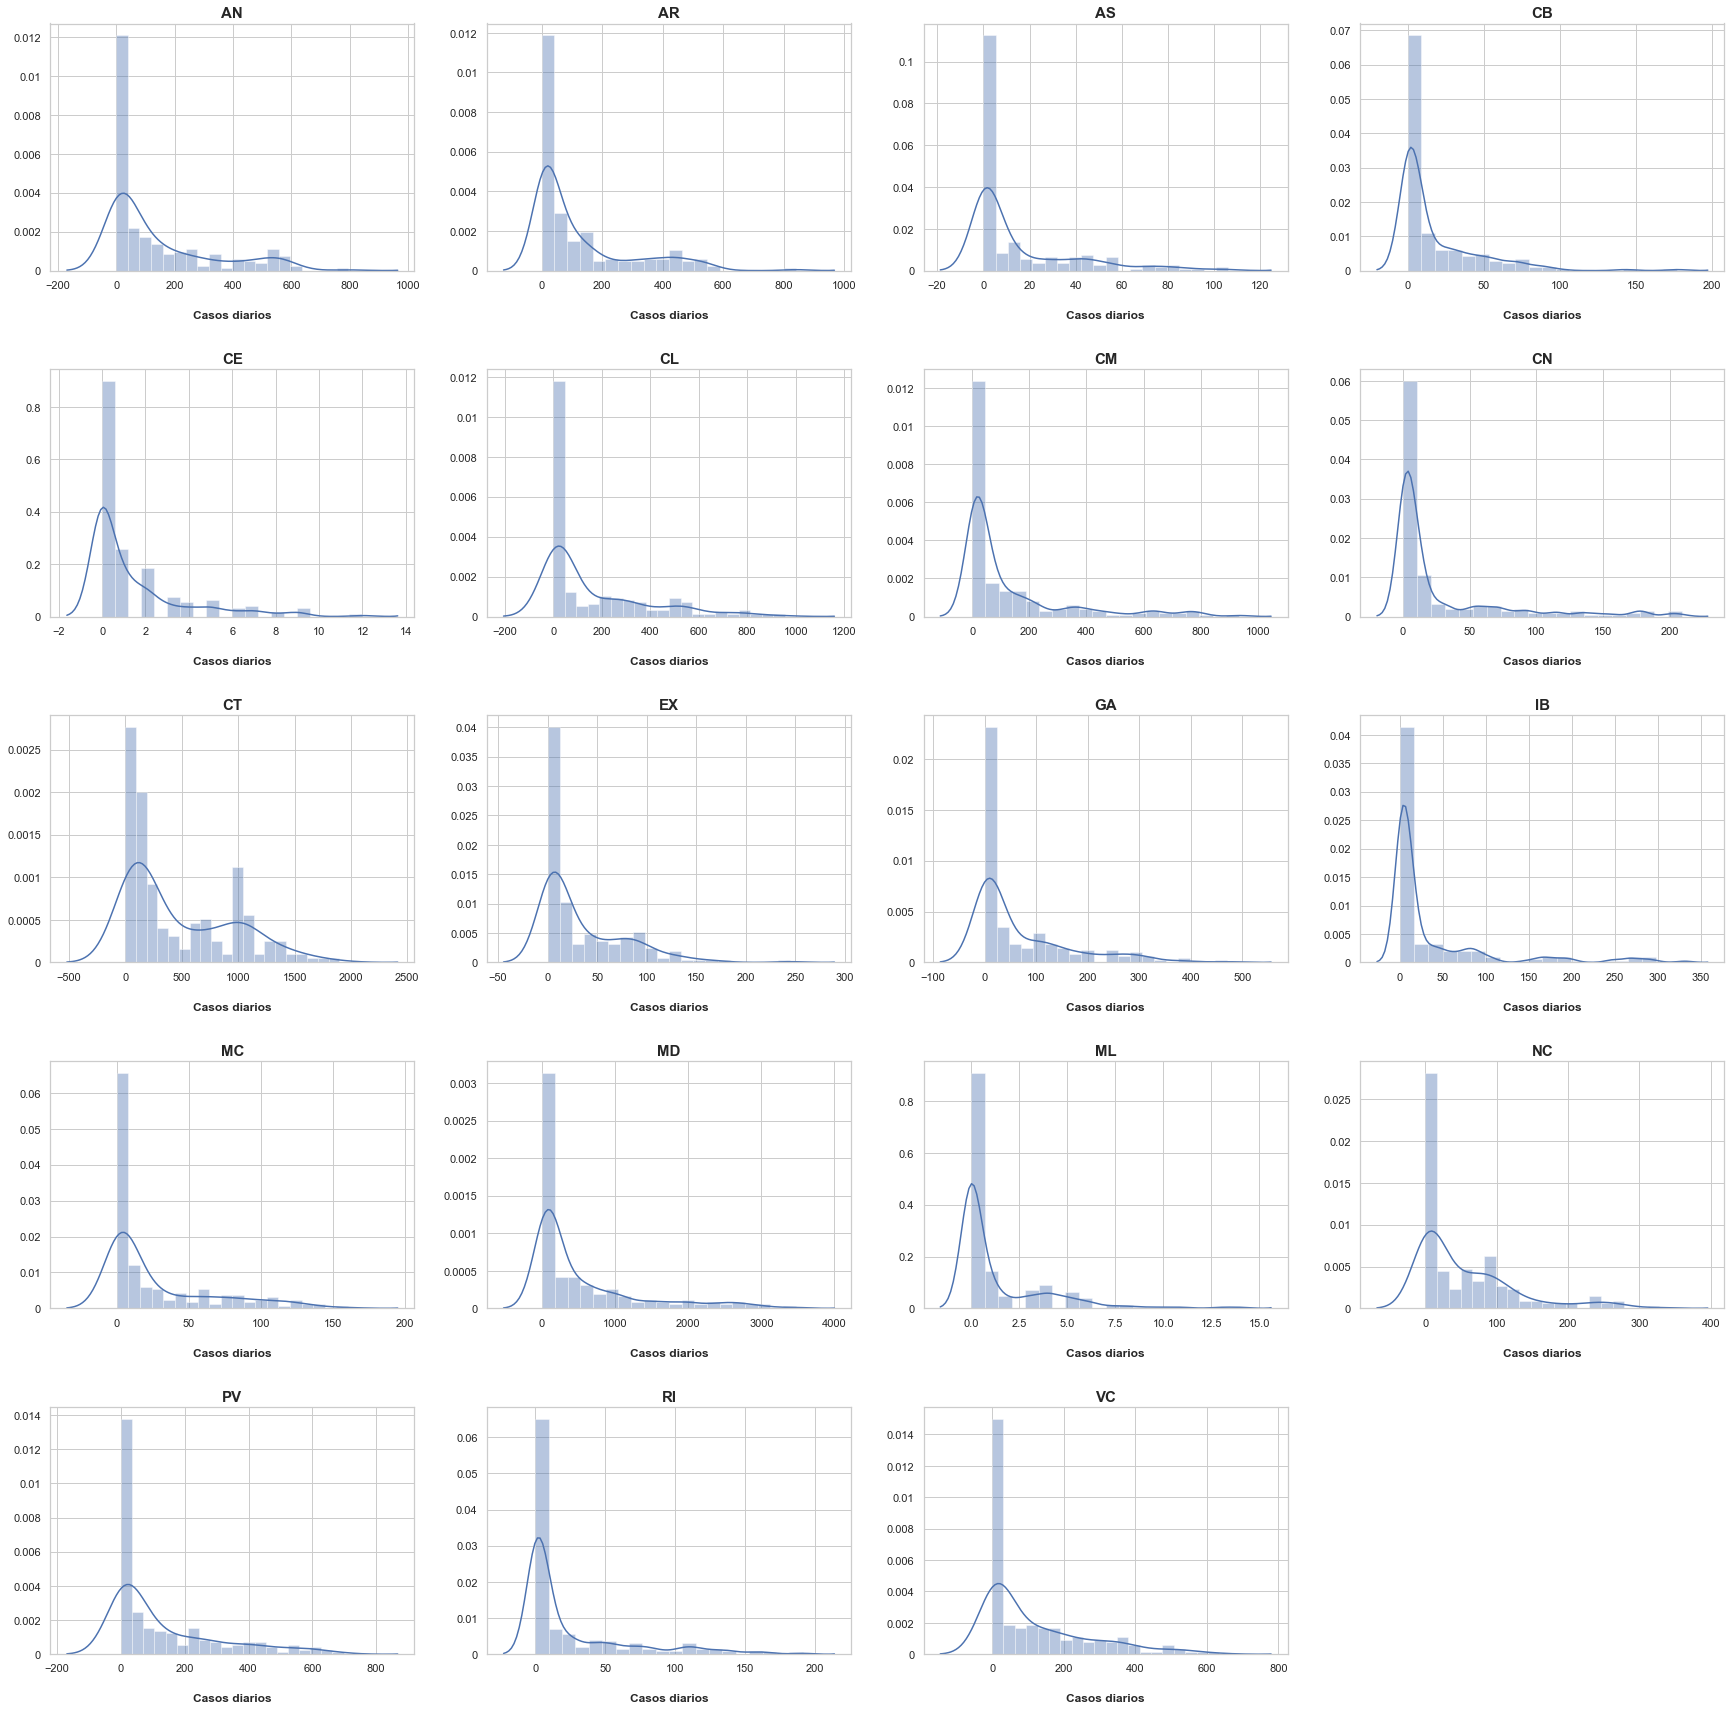

In [138]:
from matplotlib.ticker import StrMethodFormatter

n=covid.ccaa_iso.nunique()
ncols=4
nfilas=math.ceil((n-ncols)/ncols)+1

#Definimos la grid para representación
fig= plt.figure(figsize=(30,30))
gs = fig.add_gridspec(nfilas, ncols,hspace=0.4)
nf,nc=0,0
for ca in covid['ccaa_iso'].unique():
    ax=fig.add_subplot(gs[nf,nc])
    df=covid[covid['ccaa_iso']==ca]
    sns.distplot(df['num_casos'], bins = 20,ax=ax)
    #ax.hist( df['num_casos'])
    ax.set_xlabel("Casos diarios", labelpad=20, weight='bold', size=12)
    ax.set_title ( ca, weight='bold', size=15)
    # Format y-axis label
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))    #ax.legend()
    if (nc == ncols-1): 
        nf=nf+1
        nc=0
    else:
        nc=nc+1
plt.savefig('../imagenes/hist_casos.jpg')

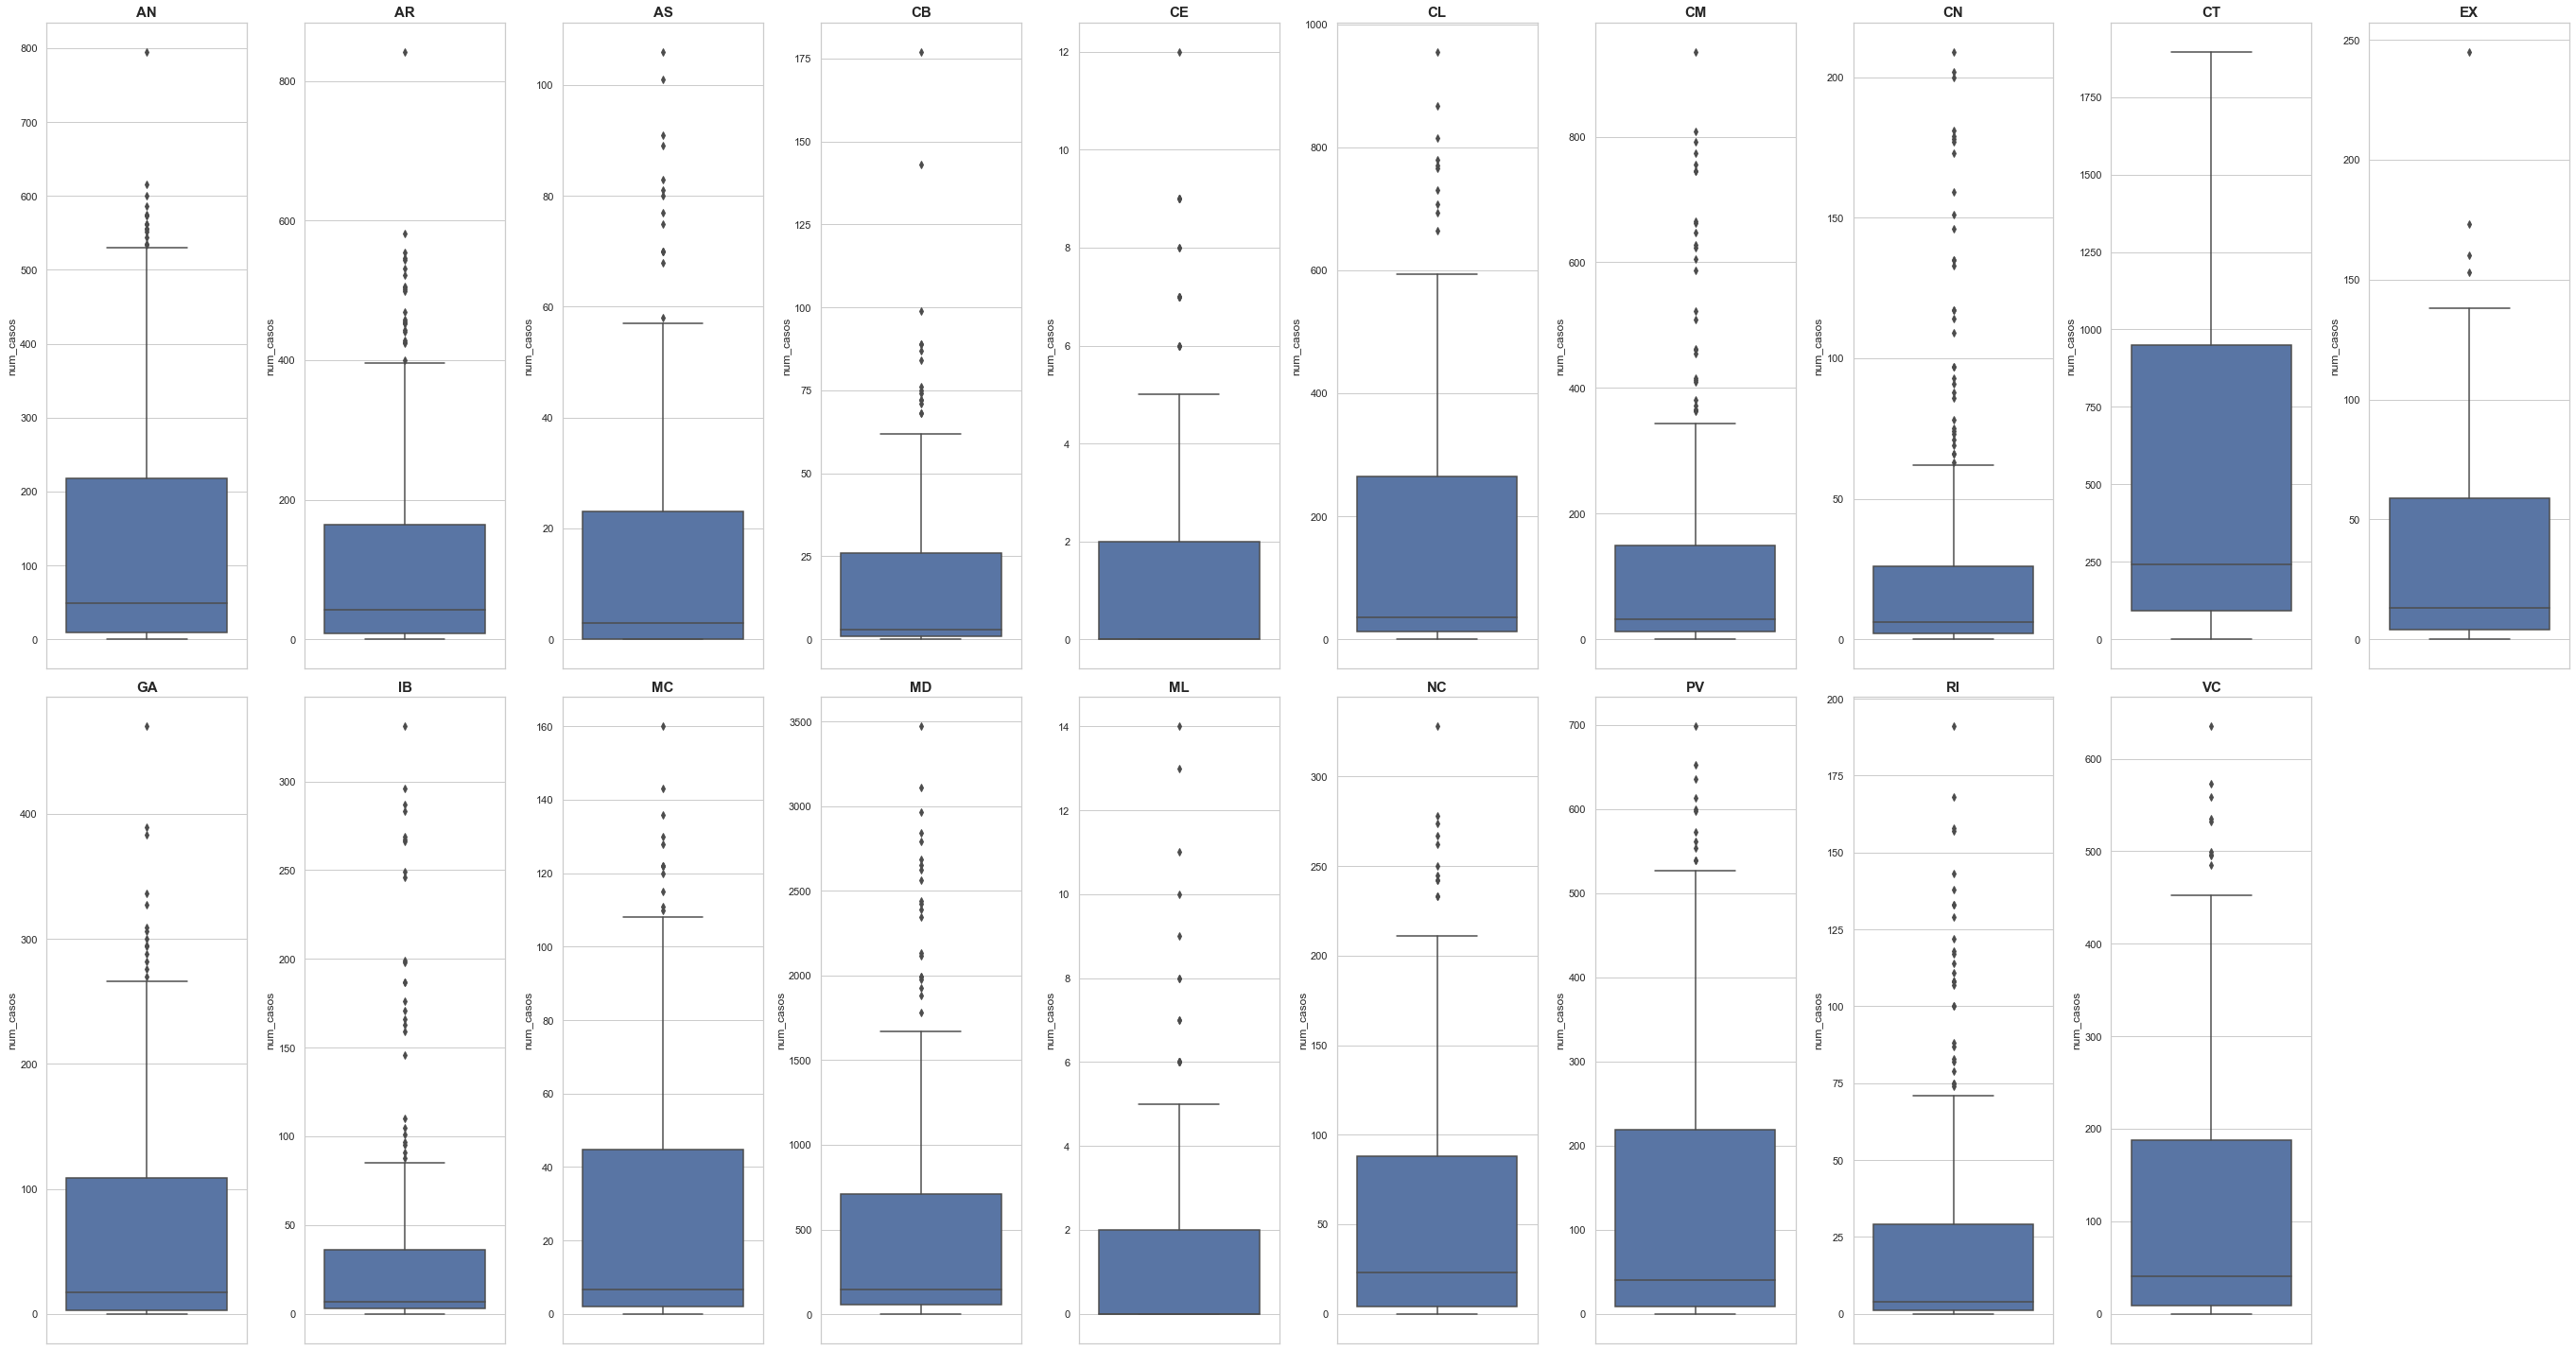

In [139]:
number_of_columns = covid['ccaa_iso'].nunique()
plt.figure(figsize=(2*number_of_columns,20))
#for category in range(0,number_of_columns):
#    plt.subplot(2 ,number_of_columns ,category+1)
#    sns.boxplot(df[columns[category]], orient='v')
#    plt.tight_layout()

nplot=1
for ca in covid['ccaa_iso'].unique():
    ax=plt.subplot (2, number_of_columns/2+1, nplot)
    df=covid[covid['ccaa_iso']==ca]
    sns.boxplot( df['num_casos'],ax=ax, orient='v')
    #ax.set_xlabel("Casos diarios", labelpad=20, weight='bold', size=12)
    ax.set_title ( ca, weight='bold', size=15)
    
    nplot=nplot+1
    plt.tight_layout()

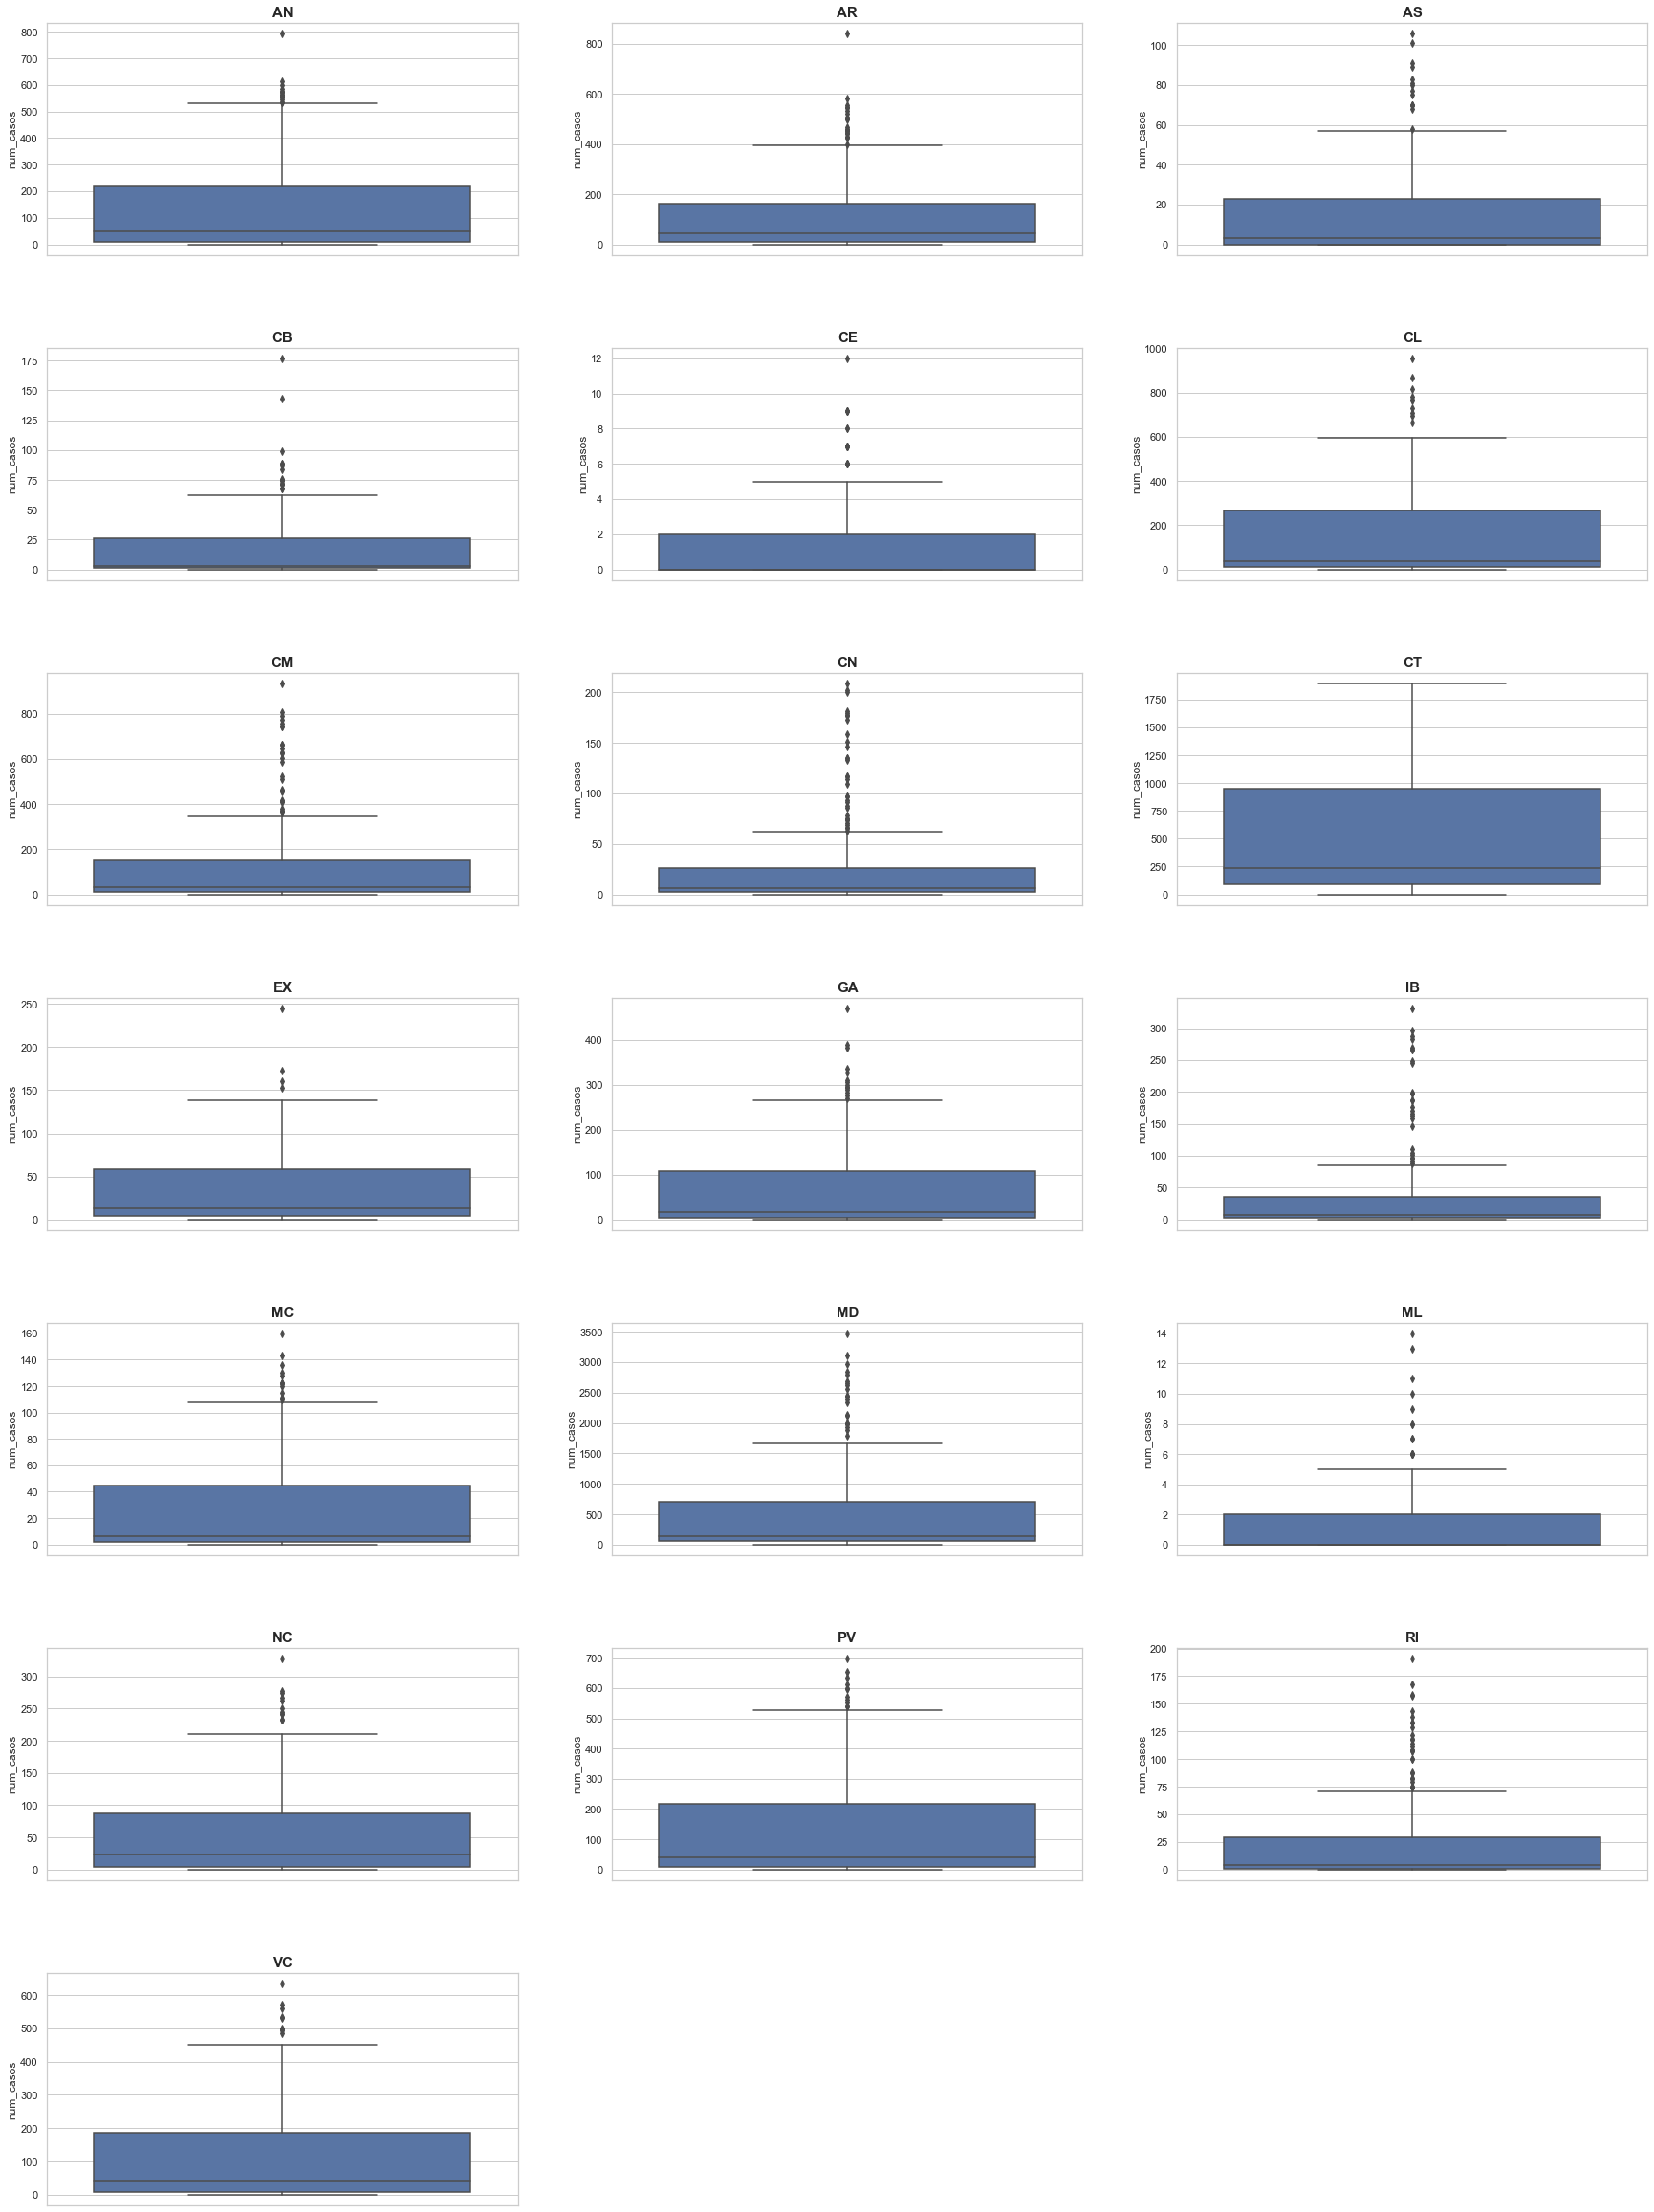

In [140]:
from matplotlib.ticker import StrMethodFormatter

n=covid.ccaa_iso.nunique()
ncols=3
nfilas=math.ceil((n-ncols)/ncols)+1

#Definimos la grid para representación
fig= plt.figure(figsize=(30,42))
gs = fig.add_gridspec(nfilas, ncols,hspace=0.4)

nf,nc=0,0
for ca in covid['ccaa_iso'].unique():
    ax=fig.add_subplot(gs[nf,nc])
    df=covid[covid['ccaa_iso']==ca]
    sns.boxplot( df['num_casos'],ax=ax, orient='v')
    #ax.set_xlabel("Casos diarios", labelpad=20, weight='bold', size=12)
    ax.set_title ( ca, weight='bold', size=15)
    # Format y-axis label
    #ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))    #ax.legend()
    if (nc == 2): 
        nf=nf+1
        nc=0
    else:
        nc=nc+1
plt.savefig('../imagenes/boxplot.jpg')

# Preprocesamiento y construcción dataset unificado

## Dataset de información de fases de COVID-19

In [188]:
# Lectura del dataset
df_fases= pd.read_csv('../datasets/info_fases_covid.csv', ';')
df_fases.reset_index (drop=True, inplace=True)
df_fases["fecha"] = pd.to_datetime(df_fases.fecha)
df_fases.head(10)

ccaa_iso        fase      fecha  reuniones  host_int  host_ext  \
0    ES-AN  cuarentena 2020-03-15          0      0.00      0.00   
1    ES-AN          f0 2020-05-04          0      0.00      0.50   
2    ES-AN          f1 2020-05-18         10      0.40      0.50   
3    ES-AN          f2 2020-06-01         15      0.50      0.75   
4    ES-AN          f3 2020-06-08         20      0.50      0.75   
5    ES-AN          nn 2020-06-21         25      0.75      1.00   
6    ES-AR  cuarentena 2020-03-15          0      0.00      0.00   
7    ES-AR          f0 2020-05-04          0      0.00      0.50   
8    ES-AR          f1 2020-05-11         10      0.40      0.50   
9    ES-AR          f2 2020-05-26         15      0.50      0.75   

   aforo_comercial  ocio_nocturno  
0             0.00            0.0  
1             0.30            0.0  
2             0.30            0.0  
3             0.40            0.0  
4             0.50            0.0  
5             0.75            0.5  
6             0.00            0.0  
7             0.30            0.0  
8             0.30            0.0  
9             0.40            0.0

In [189]:
display (df_fases.reuniones.unique())
display (df_fases.host_int.unique())
display (df_fases.host_ext.unique())
display (df_fases.aforo_comercial.unique())
display (df_fases.ocio_nocturno.unique())
display (df_fases.ccaa_iso.unique())
display (df_fases.fase.unique())

array([ 0, 10, 15, 20, 25], dtype=int64)

array([0.  , 0.4 , 0.5 , 0.75, 1.  , 0.7 , 0.8 , 0.6 ])

array([0.  , 0.5 , 0.75, 1.  , 0.9 , 0.8 ])

array([0.  , 0.3 , 0.4 , 0.5 , 0.75, 1.  , 0.6 ])

array([0.  , 0.5 , 0.75, 0.7 , 0.33, 1.  , 0.4 , 0.6 ])

array(['ES-AN', 'ES-AR', 'ES-AS', 'ES-IB', 'ES-CN', 'ES-CB', 'ES-CL',
       'ES-CM', 'ES-CT', 'ES-VC', 'ES-EX', 'ES-GA', 'ES-MD', 'ES-MC',
       'ES-NC', 'ES-PV', 'ES-RI', 'ES-CE', 'ES-ML'], dtype=object)

array(['cuarentena', 'f0', 'f1', 'f2', 'f3', 'nn'], dtype=object)

In [190]:
df_fases

ccaa_iso        fase      fecha  reuniones  host_int  host_ext  \
0      ES-AN  cuarentena 2020-03-15          0      0.00      0.00   
1      ES-AN          f0 2020-05-04          0      0.00      0.50   
2      ES-AN          f1 2020-05-18         10      0.40      0.50   
3      ES-AN          f2 2020-06-01         15      0.50      0.75   
4      ES-AN          f3 2020-06-08         20      0.50      0.75   
..       ...         ...        ...        ...       ...       ...   
109    ES-ML          f0 2020-05-04          0      0.00      0.50   
110    ES-ML          f1 2020-05-11         10      0.40      0.50   
111    ES-ML          f2 2020-05-25         15      0.50      0.75   
112    ES-ML          f3 2020-06-08         20      0.50      0.75   
113    ES-ML          nn 2020-06-21         25      0.75      1.00   

     aforo_comercial  ocio_nocturno  
0               0.00           0.00  
1               0.30           0.00  
2               0.30           0.00  
3               0.40           0.00  
4               0.50           0.00  
..               ...            ...  
109             0.30           0.00  
110             0.30           0.00  
111             0.40           0.00  
112             0.50           0.00  
113             0.75           0.75  

[114 rows x 8 columns]

## Conjunto de datos de movilidad

In [144]:
# Eliminamos las columnas sub_region_2 y census_fips_code y metro_area que están vacíos para el conjunto de datos de España
google.drop (['country_region_code','country_region','sub_region_2','census_fips_code','metro_area'], axis=1, inplace=True)

In [145]:
#Renombrado de columnas en dataset de Google
google.rename (columns={'retail_and_recreation_percent_change_from_baseline':'ocio',
                          'grocery_and_pharmacy_percent_change_from_baseline':'compra',
                          'parks_percent_change_from_baseline':'parques','transit_stations_percent_change_from_baseline':'transporte',
                          'workplaces_percent_change_from_baseline':'trabajo','residential_percent_change_from_baseline':'residencial',
                          'sub_region_1':'ccaa_nombre','date':'fecha','iso_3166_2_code':'ccaa_iso'},inplace=True)



In [146]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 3666
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ccaa_nombre  3667 non-null   object 
 1   ccaa_iso     3667 non-null   object 
 2   fecha        3667 non-null   object 
 3   ocio         3667 non-null   float64
 4   compra       3667 non-null   float64
 5   parques      3667 non-null   float64
 6   transporte   3667 non-null   float64
 7   trabajo      3667 non-null   float64
 8   residencial  3667 non-null   float64
dtypes: float64(6), object(3)
memory usage: 286.5+ KB


## Conjunto de datos de número de casos por COVID

In [147]:
# Unificamos códigos iso
covid.ccaa_iso= 'ES-' + covid.ccaa_iso

In [148]:
covid.ccaa_iso.unique()

array(['ES-AN', 'ES-AR', 'ES-AS', 'ES-CB', 'ES-CE', 'ES-CL', 'ES-CM',
       'ES-CN', 'ES-CT', 'ES-EX', 'ES-GA', 'ES-IB', 'ES-MC', 'ES-MD',
       'ES-ML', 'ES-NC', 'ES-PV', 'ES-RI', 'ES-VC'], dtype=object)

In [149]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 0 to 3913
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ccaa_iso                      3914 non-null   object
 1   fecha                         3914 non-null   object
 2   num_casos                     3914 non-null   int64 
 3   num_casos_prueba_pcr          3914 non-null   int64 
 4   num_casos_prueba_test_ac      3914 non-null   int64 
 5   num_casos_prueba_otras        3914 non-null   int64 
 6   num_casos_prueba_desconocida  3914 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 404.6+ KB


In [150]:
google.head()

ccaa_nombre ccaa_iso       fecha  ocio  compra  parques  transporte  \
0   Andalusia    ES-AN  2020-02-15   5.0    -1.0     33.0        15.0   
1   Andalusia    ES-AN  2020-02-16   6.0     4.0     17.0        10.0   
2   Andalusia    ES-AN  2020-02-17   0.0     0.0     10.0         8.0   
3   Andalusia    ES-AN  2020-02-18  -1.0     0.0      6.0         7.0   
4   Andalusia    ES-AN  2020-02-19   0.0     0.0      7.0         6.0   

   trabajo  residencial  
0      0.0         -2.0  
1      1.0         -4.0  
2      4.0         -1.0  
3      4.0         -1.0  
4      3.0          0.0

In [151]:
covid.head()

ccaa_iso       fecha  num_casos  num_casos_prueba_pcr  \
0    ES-AN  2020-01-31          0                     0   
1    ES-AR  2020-01-31          0                     0   
2    ES-AS  2020-01-31          0                     0   
3    ES-CB  2020-01-31          0                     0   
4    ES-CE  2020-01-31          0                     0   

   num_casos_prueba_test_ac  num_casos_prueba_otras  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   num_casos_prueba_desconocida  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0

In [191]:
#Fusionamos los dos dataset
#merged = pd.merge(left=covid,right=google, how='left', on=['fecha','ccaa_iso'])
merged = pd.merge(left=covid,right=google, how='left', on=['fecha','ccaa_iso'])

In [192]:
merged.head()

ccaa_iso       fecha  num_casos  num_casos_prueba_pcr  \
0    ES-AN  2020-01-31          0                     0   
1    ES-AR  2020-01-31          0                     0   
2    ES-AS  2020-01-31          0                     0   
3    ES-CB  2020-01-31          0                     0   
4    ES-CE  2020-01-31          0                     0   

   num_casos_prueba_test_ac  num_casos_prueba_otras  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   

   num_casos_prueba_desconocida ccaa_nombre  ocio  compra  parques  \
0                             0         NaN   NaN     NaN      NaN   
1                             0         NaN   NaN     NaN      NaN   
2                             0         NaN   NaN     NaN      NaN   
3                             0         NaN   NaN     NaN      NaN   
4                             0         NaN   NaN     NaN      NaN   

   transporte  trabajo  residencial  
0         NaN      NaN          NaN  
1         NaN      NaN          NaN  
2         NaN      NaN          NaN  
3         NaN      NaN          NaN  
4         NaN      NaN          NaN

In [193]:
merged.tail()

ccaa_iso       fecha  num_casos  num_casos_prueba_pcr  \
3909    ES-ML  2020-08-23         13                    12   
3910    ES-NC  2020-08-23         70                    70   
3911    ES-PV  2020-08-23        636                   636   
3912    ES-RI  2020-08-23         63                    63   
3913    ES-VC  2020-08-23        152                   152   

      num_casos_prueba_test_ac  num_casos_prueba_otras  \
3909                         0                       0   
3910                         0                       0   
3911                         0                       0   
3912                         0                       0   
3913                         0                       0   

      num_casos_prueba_desconocida          ccaa_nombre  ocio  compra  \
3909                             1              Melilla -21.0   -22.0   
3910                             0              Navarre -15.0    -1.0   
3911                             0       Basque Country -36.0   -12.0   
3912                             0             La Rioja -10.0     3.0   
3913                             0  Valencian Community -19.0    -4.0   

      parques  transporte  trabajo  residencial  
3909     28.0       -27.0      5.0          7.0  
3910     50.0       -33.0     10.0         -3.0  
3911     15.0       -37.0     10.0         -4.0  
3912     36.0        -9.0     10.0         -4.0  
3913     41.0       -35.0      9.0         -1.0

In [194]:
merged.isna().sum()

ccaa_iso                          0
fecha                             0
num_casos                         0
num_casos_prueba_pcr              0
num_casos_prueba_test_ac          0
num_casos_prueba_otras            0
num_casos_prueba_desconocida      0
ccaa_nombre                     285
ocio                            285
compra                          285
parques                         285
transporte                      285
trabajo                         285
residencial                     285
dtype: int64

In [195]:
merged[merged['fecha']=='2020-01-31']

ccaa_iso       fecha  num_casos  num_casos_prueba_pcr  \
0     ES-AN  2020-01-31          0                     0   
1     ES-AR  2020-01-31          0                     0   
2     ES-AS  2020-01-31          0                     0   
3     ES-CB  2020-01-31          0                     0   
4     ES-CE  2020-01-31          0                     0   
5     ES-CL  2020-01-31          0                     0   
6     ES-CM  2020-01-31          0                     0   
7     ES-CN  2020-01-31          0                     0   
8     ES-CT  2020-01-31          1                     1   
9     ES-EX  2020-01-31          0                     0   
10    ES-GA  2020-01-31          0                     0   
11    ES-IB  2020-01-31          0                     0   
12    ES-MC  2020-01-31          0                     0   
13    ES-MD  2020-01-31          4                     4   
14    ES-ML  2020-01-31          0                     0   
15    ES-NC  2020-01-31          0                     0   
16    ES-PV  2020-01-31          0                     0   
17    ES-RI  2020-01-31          0                     0   
18    ES-VC  2020-01-31          4                     3   

    num_casos_prueba_test_ac  num_casos_prueba_otras  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   
5                          0                       0   
6                          0                       0   
7                          0                       0   
8                          0                       0   
9                          0                       0   
10                         0                       0   
11                         0                       0   
12                         0                       0   
13                         0                       0   
14                         0                       0   
15                         0                       0   
16                         0                       0   
17                         0                       0   
18                         1                       0   

    num_casos_prueba_desconocida ccaa_nombre  ocio  compra  parques  \
0                              0         NaN   NaN     NaN      NaN   
1                              0         NaN   NaN     NaN      NaN   
2                              0         NaN   NaN     NaN      NaN   
3                              0         NaN   NaN     NaN      NaN   
4                              0         NaN   NaN     NaN      NaN   
5                              0         NaN   NaN     NaN      NaN   
6                              0         NaN   NaN     NaN      NaN   
7                              0         NaN   NaN     NaN      NaN   
8                              0         NaN   NaN     NaN      NaN   
9                              0         NaN   NaN     NaN      NaN   
10                             0         NaN   NaN     NaN      NaN   
11                             0         NaN   NaN     NaN      NaN   
12                             0         NaN   NaN     NaN      NaN   
13                             0         NaN   NaN     NaN      NaN   
14                             0         NaN   NaN     NaN      NaN   
15                             0         NaN   NaN     NaN      NaN   
16                             0         NaN   NaN     NaN      NaN   
17                             0         NaN   NaN     NaN      NaN   
18                             0         NaN   NaN     NaN      NaN   

    transporte  trabajo  residencial  
0          NaN      NaN          NaN  
1          NaN      NaN          NaN  
2          NaN      NaN          NaN  
3          NaN      NaN          NaN  
4          NaN      NaN          NaN  
5          NaN      NaN   

In [196]:
merged[merged['ccaa_iso']=='ES-AN'].head(20)

ccaa_iso       fecha  num_casos  num_casos_prueba_pcr  \
0      ES-AN  2020-01-31          0                     0   
19     ES-AN  2020-02-01          2                     2   
38     ES-AN  2020-02-02          2                     1   
57     ES-AN  2020-02-03          1                     1   
76     ES-AN  2020-02-04          1                     0   
95     ES-AN  2020-02-05          1                     0   
114    ES-AN  2020-02-06          2                     1   
133    ES-AN  2020-02-07          2                     2   
152    ES-AN  2020-02-08          0                     0   
171    ES-AN  2020-02-09          1                     0   
190    ES-AN  2020-02-10          1                     1   
209    ES-AN  2020-02-11          1                     0   
228    ES-AN  2020-02-12          1                     1   
247    ES-AN  2020-02-13          2                     1   
266    ES-AN  2020-02-14          1                     1   
285    ES-AN  2020-02-15          4                     1   
304    ES-AN  2020-02-16          0                     0   
323    ES-AN  2020-02-17          2                     0   
342    ES-AN  2020-02-18          3                     3   
361    ES-AN  2020-02-19          1                     0   

     num_casos_prueba_test_ac  num_casos_prueba_otras  \
0                           0                       0   
19                          0                       0   
38                          1                       0   
57                          0                       0   
76                          1                       0   
95                          1                       0   
114                         1                       0   
133                         0                       0   
152                         0                       0   
171                         1                       0   
190                         0                       0   
209                         1                       0   
228                         0                       0   
247                         1                       0   
266                         0                       0   
285                         3                       0   
304                         0                       0   
323                         2                       0   
342                         0                       0   
361                         1                       0   

     num_casos_prueba_desconocida ccaa_nombre  ocio  compra  parques  \
0                               0         NaN   NaN     NaN      NaN   
19                              0         NaN   NaN     NaN      NaN   
38                              0         NaN   NaN     NaN      NaN   
57                              0         NaN   NaN     NaN      NaN   
76                              0         NaN   NaN     NaN      NaN   
95                              0         NaN   NaN     NaN      NaN   
114                             0         NaN   NaN     NaN      NaN   
133                             0         NaN   NaN     NaN      NaN   
152                             0         NaN   NaN     NaN      NaN   
171                             0         NaN   NaN     NaN      NaN   
190                             0         NaN   NaN     NaN      NaN   
209                             0         NaN   NaN     NaN      NaN   
228                             0         NaN   NaN     NaN      NaN   
247                             0         NaN   NaN     NaN      NaN   
266                             0         NaN   NaN     NaN      NaN   
285                             0   Andalusia   5.0    -1.0     33.0   
304                             0   Andalusia   6.0     4.0     17.0   
323                             0   Andalusia   0.0     0.0     10.0   
342                             0   Andalusia  -1.0     0.0      6.0   
361                             0   Andalusia   0.0     0.0      7.0   

     transp

Los valores faltantes del nuevo dataset corresponden a los registros de movilidad previos a la fecha del 15-2-2020 que es la fecha de inicio de registro de datos de movilidad. 
En dichos registros copio los valores de los siguientes 15 días


In [197]:
#df.iloc[0:284,[7,8,9]]
merged.iloc[0:285,7:14]=merged.iloc[285:570,7:14].values

In [198]:
merged[merged['ccaa_iso']=='ES-VC'].head(20)

ccaa_iso       fecha  num_casos  num_casos_prueba_pcr  \
18     ES-VC  2020-01-31          4                     3   
37     ES-VC  2020-02-01          1                     1   
56     ES-VC  2020-02-02          0                     0   
75     ES-VC  2020-02-03          5                     1   
94     ES-VC  2020-02-04          1                     0   
113    ES-VC  2020-02-05          3                     0   
132    ES-VC  2020-02-06          2                     2   
151    ES-VC  2020-02-07          1                     0   
170    ES-VC  2020-02-08          0                     0   
189    ES-VC  2020-02-09          0                     0   
208    ES-VC  2020-02-10          4                     1   
227    ES-VC  2020-02-11          1                     1   
246    ES-VC  2020-02-12          1                     1   
265    ES-VC  2020-02-13          2                     1   
284    ES-VC  2020-02-14          2                     2   
303    ES-VC  2020-02-15          4                     4   
322    ES-VC  2020-02-16          1                     1   
341    ES-VC  2020-02-17          6                     3   
360    ES-VC  2020-02-18          2                     1   
379    ES-VC  2020-02-19          2                     1   

     num_casos_prueba_test_ac  num_casos_prueba_otras  \
18                          1                       0   
37                          0                       0   
56                          0                       0   
75                          3                       0   
94                          1                       0   
113                         3                       0   
132                         0                       0   
151                         1                       0   
170                         0                       0   
189                         0                       0   
208                         3                       0   
227                         0                       0   
246                         0                       0   
265                         1                       0   
284                         0                       0   
303                         0                       0   
322                         0                       0   
341                         3                       0   
360                         1                       0   
379                         1                       0   

     num_casos_prueba_desconocida          ccaa_nombre  ocio  compra  parques  \
18                              0  Valencian Community   2.0     0.0     33.0   
37                              0  Valencian Community  -3.0     0.0      8.0   
56                              0  Valencian Community  -2.0     2.0      9.0   
75                              1  Valencian Community  -6.0    -2.0    -11.0   
94                              0  Valencian Community  -1.0     0.0     10.0   
113                             0  Valencian Community   0.0    -1.0     14.0   
132                             0  Valencian Community   0.0     1.0     15.0   
151                             0  Valencian Community   1.0     1.0     42.0   
170                             0  Valencian Community   0.0     5.0     18.0   
189                             0  Valencian Community  -1.0     3.0     19.0   
208                             0  Valencian Community  -1.0     6.0     21.0   
227                             0  Valencian Community  -1.0     4.0     18.0   
246                             0  Valencian Community   1.0     3.0     17.0   
265                             0  Valencian Community   3.0     5.0     21.0   
284                             0  Valencian Community   4.0     3.0     48.0   
303                             0  Valencian Community   2.0     0.0     33.0   
322                             0  Valencian Community  -3.0     0.0      8.0   
341                             0  Valencian Community  -2.0     2

In [199]:
#Estudio de rango de fechas de cada uno de los dataset
#Conversión de los campos fecha a tipo date
#google["date"] = pd.to_datetime(google.date)
min_fecha_google=google.fecha.min()
max_fecha_google=google.fecha.max()

min_fecha_covid=covid.fecha.min()
max_fecha_covid=covid.fecha.max()

print ("Rango fechas dataset Google:     " + str (min_fecha_google) + " a " + str (max_fecha_google))
print ("Rango fechas dataset COVID:      " + str (min_fecha_covid) + " a " + str (max_fecha_covid))

Rango fechas dataset Google:     2020-02-15 a 2020-08-25
Rango fechas dataset COVID:      2020-01-31 a 2020-08-23


In [200]:
merged.reset_index(drop=True, inplace=True)
merged

ccaa_iso       fecha  num_casos  num_casos_prueba_pcr  \
0       ES-AN  2020-01-31          0                     0   
1       ES-AR  2020-01-31          0                     0   
2       ES-AS  2020-01-31          0                     0   
3       ES-CB  2020-01-31          0                     0   
4       ES-CE  2020-01-31          0                     0   
...       ...         ...        ...                   ...   
3909    ES-ML  2020-08-23         13                    12   
3910    ES-NC  2020-08-23         70                    70   
3911    ES-PV  2020-08-23        636                   636   
3912    ES-RI  2020-08-23         63                    63   
3913    ES-VC  2020-08-23        152                   152   

      num_casos_prueba_test_ac  num_casos_prueba_otras  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
...                        ...                     ...   
3909                         0                       0   
3910                         0                       0   
3911                         0                       0   
3912                         0                       0   
3913                         0                       0   

      num_casos_prueba_desconocida          ccaa_nombre  ocio  compra  \
0                                0            Andalusia   5.0    -1.0   
1                                0               Aragon   3.0     7.0   
2                                0             Asturias   0.0    -1.0   
3                                0            Cantabria   6.0     4.0   
4                                0                Ceuta  -3.0    -6.0   
...                            ...                  ...   ...     ...   
3909                             1              Melilla -21.0   -22.0   
3910                             0              Navarre -15.0    -1.0   
3911                             0       Basque Country -36.0   -12.0   
3912                             0             La Rioja -10.0     3.0   
3913                             0  Valencian Community -19.0    -4.0   

      parques  transporte  trabajo  residencial  
0        33.0   15.000000      0.0    -2.000000  
1        42.0   10.000000      1.0    -3.000000  
2        20.0    8.000000      0.0    -1.000000  
3        53.0    4.000000     -1.0    -2.000000  
4         3.0  -38.617647     -1.0     5.666667  
...       ...         ...      ...          ...  
3909     28.0  -27.000000      5.0     7.000000  
3910     50.0  -33.000000     10.0    -3.000000  
3911     15.0  -37.000000     10.0    -4.000000  
3912     36.0   -9.000000     10.0    -4.000000  
3913     41.0  -35.000000      9.0    -1.000000  

[3914 rows x 14 columns]

Inclusión de los valores de las fases

In [201]:

def inserta_valores_fases( row,col):  
    ca=row['ccaa_iso']
    
    #print ('-->> CCAA=', ca)
    #Obtengo los rangos de fechas para la comunidad del dataset de fases
    #f_cuarentena = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='cuarentena')]['fecha']
    #f_f0 = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f0')]['fecha']
    #f_f1 = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f1')]['fecha']
    #f_f2 = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f2')]['fecha']
    #f_f3 = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f3')]['fecha']
    #f_nn = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='nn')]['fecha']
    #f_cuarentena=f_cuarentena[0]
    #f_f0=f_f0[0]
    #f_f1=f_f1[0]
    #f_f2=f_f2[0]
    #f_f3=f_f3[0]
    #f_nn=f_nn[0]

    if (col=='reuniones'):
        valor_inicial=100
    else:
        valor_inicial=1
    
    f_cuarentena = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='cuarentena')]['fecha'].values[0]
    #print (f_cuarentena)
    f_f0 = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f0')]['fecha'].values[0]
    f_f1 = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f1')]['fecha'].values[0]
    f_f2 = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f2')]['fecha'].values[0]
    f_f3 = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f3')]['fecha'].values[0]
    f_nn = df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='nn')]['fecha'].values[0]

    #print ('Buscamos valor por rango de fechas')
    #print ('Fecha:', row ['fecha'])
    if (row ['fecha'] < f_cuarentena):
            valor=valor_inicial #
            #print ('Valor inicial a insertar')
    elif ((row ['fecha'] >= f_cuarentena) and (row ['fecha'] < f_f0) ):
            valor=df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='cuarentena')][col].values[0]

    elif ((row ['fecha'] >= f_f0) and (row ['fecha'] < f_f1) ):
            valor=df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f0')][col].values[0]
            #print ('Valor a insertar f0:', valor)  
    elif ((row ['fecha'] >= f_f1) and (row ['fecha'] < f_f2) ):
            valor=df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f1')][col].values[0]
            #print ('Valor a insertar f1:', valor)  
    elif ((row ['fecha'] >= f_f2) and (row ['fecha'] < f_f3) ):
            valor=df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f2')][col].values[0]
            #print ('Valor a insertar f2:', valor)  
    elif ((row ['fecha'] >= f_f3) and (row ['fecha'] < f_nn) ):
            valor=df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='f3')][col].values[0]
            #print ('Valor a insertar f3:', valor)  
    elif (row ['fecha'] >= f_nn):
            valor=df_fases[(df_fases['ccaa_iso']== ca) & (df_fases['fase']=='nn')][col].values[0]
            #print ('Valor a insertar nn:', valor)  
    else:
        return    
    #print (valor)
    return (valor)

merged["fecha"] = pd.to_datetime(merged.fecha)
merged['reuniones']=merged.apply(lambda row: inserta_valores_fases( row,'reuniones'),axis=1)
merged['host_int']=merged.apply(lambda row: inserta_valores_fases( row,'host_int'),axis=1)
merged['host_ext']=merged.apply(lambda row: inserta_valores_fases( row,'host_ext'),axis=1)
merged['aforo_comercial']=merged.apply(lambda row: inserta_valores_fases( row,'aforo_comercial'),axis=1)
merged['ocio_nocturno']=merged.apply(lambda row: inserta_valores_fases( row,'ocio_nocturno'),axis=1)

In [202]:

merged.rename(columns={'num_casos': 'casos'}, inplace=True)

In [203]:
merged.tail()

ccaa_iso      fecha  casos  num_casos_prueba_pcr  \
3909    ES-ML 2020-08-23     13                    12   
3910    ES-NC 2020-08-23     70                    70   
3911    ES-PV 2020-08-23    636                   636   
3912    ES-RI 2020-08-23     63                    63   
3913    ES-VC 2020-08-23    152                   152   

      num_casos_prueba_test_ac  num_casos_prueba_otras  \
3909                         0                       0   
3910                         0                       0   
3911                         0                       0   
3912                         0                       0   
3913                         0                       0   

      num_casos_prueba_desconocida          ccaa_nombre  ocio  compra  \
3909                             1              Melilla -21.0   -22.0   
3910                             0              Navarre -15.0    -1.0   
3911                             0       Basque Country -36.0   -12.0   
3912                             0             La Rioja -10.0     3.0   
3913                             0  Valencian Community -19.0    -4.0   

      parques  transporte  trabajo  residencial  reuniones  host_int  \
3909     28.0       -27.0      5.0          7.0         25      0.75   
3910     50.0       -33.0     10.0         -3.0         25      0.75   
3911     15.0       -37.0     10.0         -4.0         25      1.00   
3912     36.0        -9.0     10.0         -4.0         25      1.00   
3913     41.0       -35.0      9.0         -1.0         25      0.75   

      host_ext  aforo_comercial  ocio_nocturno  
3909       1.0             0.75           0.75  
3910       1.0             0.75           0.75  
3911       1.0             1.00           0.60  
3912       1.0             1.00           0.75  
3913       1.0             0.75           0.33

In [204]:
merged.head()

ccaa_iso      fecha  casos  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
0    ES-AN 2020-01-31      0                     0                         0   
1    ES-AR 2020-01-31      0                     0                         0   
2    ES-AS 2020-01-31      0                     0                         0   
3    ES-CB 2020-01-31      0                     0                         0   
4    ES-CE 2020-01-31      0                     0                         0   

   num_casos_prueba_otras  num_casos_prueba_desconocida ccaa_nombre  ocio  \
0                       0                             0   Andalusia   5.0   
1                       0                             0      Aragon   3.0   
2                       0                             0    Asturias   0.0   
3                       0                             0   Cantabria   6.0   
4                       0                             0       Ceuta  -3.0   

   compra  parques  transporte  trabajo  residencial  reuniones  host_int  \
0    -1.0     33.0   15.000000      0.0    -2.000000        100       1.0   
1     7.0     42.0   10.000000      1.0    -3.000000        100       1.0   
2    -1.0     20.0    8.000000      0.0    -1.000000        100       1.0   
3     4.0     53.0    4.000000     -1.0    -2.000000        100       1.0   
4    -6.0      3.0  -38.617647     -1.0     5.666667        100       1.0   

   host_ext  aforo_comercial  ocio_nocturno  
0       1.0              1.0            1.0  
1       1.0              1.0            1.0  
2       1.0              1.0            1.0  
3       1.0              1.0            1.0  
4       1.0              1.0            1.0

In [205]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ccaa_iso                      3914 non-null   object        
 1   fecha                         3914 non-null   datetime64[ns]
 2   casos                         3914 non-null   int64         
 3   num_casos_prueba_pcr          3914 non-null   int64         
 4   num_casos_prueba_test_ac      3914 non-null   int64         
 5   num_casos_prueba_otras        3914 non-null   int64         
 6   num_casos_prueba_desconocida  3914 non-null   int64         
 7   ccaa_nombre                   3914 non-null   object        
 8   ocio                          3914 non-null   float64       
 9   compra                        3914 non-null   float64       
 10  parques                       3914 non-null   float64       
 11  transporte                    

In [206]:
merged.ccaa_iso.value_counts()

ES-AN    206
ES-CL    206
ES-NC    206
ES-MC    206
ES-ML    206
ES-AS    206
ES-PV    206
ES-IB    206
ES-CT    206
ES-GA    206
ES-EX    206
ES-CN    206
ES-CM    206
ES-MD    206
ES-AR    206
ES-CB    206
ES-RI    206
ES-CE    206
ES-VC    206
Name: ccaa_iso, dtype: int64

In [207]:
#Estudio de rango de fechas de cada uno de los dataset
#Conversión de los campos fecha a tipo date
#google["date"] = pd.to_datetime(google.date)
min_fecha=google.fecha.min()
max_fecha=google.fecha.max()

print ("Rango fechas dataset :     " + str (min_fecha) + " a " + str (max_fecha))


Rango fechas dataset :     2020-02-15 a 2020-08-25


In [208]:
ccaa = pd.read_csv('tableau_ccaa.csv', ',')
ccaa

Ccaa Nombre Latitud (generado) Longitud (generado)
0                     Rioja, La             42,283             -2,4825
1                    País Vasco             42,966             -2,5635
2   Navarra, Comunidad Foral de            42,6162             -1,8264
3             Murcia, Región de            38,0684             -1,6725
4                       Melilla            35,2928             -2,9507
5          Madrid, Comunidad de              40,42               -3,69
6                       Galicia            42,8068             -7,8806
7                   Extremadura            39,2249             -5,9773
8          Comunitat Valenciana            39,3318             -0,7885
9                         Ceuta            35,8941             -5,3554
10                     Cataluña             41,703               1,616
11              Castilla y León              41,66               -4,25
12         Castilla - La Mancha               39,5                  -3
13                    Cantabria            43,1371             -4,2639
14                     Canarias            28,2941            -16,6221
15               Balears, Illes            39,6143               2,889
16      Asturias, Principado de            43,2728             -5,8538
17                       Aragón            41,4038             -0,8149
18                    Andalucía            37,3763             -4,5348

In [209]:
#Conversión necesaria para que Tableau pueda reconocer las comunidades para crear un mapa
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Andalusia','Andalucía')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Aragon','Aragón')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Asturias','Principado de Asturias')#'Asturias, Principado de')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Cantabria','Cantabria')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Ceuta','Ceuta')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Castile and León','Castilla y León')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Castile-La Mancha','Castilla - La Mancha')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Canary Islands','Canarias')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Catalonia','Cataluña')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Extremadura','Extremadura')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Galicia','Galicia')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Balearic Islands','Illes Balears')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Region of Murcia','Murcia')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Community of Madrid','Comunidad de Madrid')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Melilla','Melilla')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Navarre','Comunidad Foral de Navarra')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Basque Country','País Vasco')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('La Rioja','La Rioja')
merged['ccaa_nombre']=merged['ccaa_nombre'].replace('Valencian Community','Comunitat Valenciana')


## Datos de densidad de población por CA para visualización

In [210]:
#Incluimos la densidad de población para visualización
densidad_poblacion={}
densidad_poblacion['Andalucía']={'Pob':8414240,'Sup':87588.45}
densidad_poblacion['Aragón']={'Pob':1319291,'Sup':47698.07}
densidad_poblacion['Principado de Asturias']={'Pob':1022800,'Sup':10597.42}
densidad_poblacion['Illes Balears']={'Pob':1149460,'Sup':4991.71}
densidad_poblacion['Canarias']={'Pob':2153389,'Sup':7445.1}
densidad_poblacion['Cantabria']={'Pob':581078,'Sup':5261.12}
densidad_poblacion['Castilla y León']={'Pob':2399548,'Sup':93874.95}
densidad_poblacion['Castilla - La Mancha']={'Pob':2032863,'Sup':79406.77}
densidad_poblacion['Cataluña']={'Pob':7675217,'Sup':32109.05}
densidad_poblacion['Ceuta']={'Pob':84777,'Sup':19.87}
densidad_poblacion['Comunitat Valenciana']={'Pob':5003769,'Sup':23261.91}
densidad_poblacion['Extremadura']={'Pob':1067710,'Sup':41635.33}
densidad_poblacion['Galicia']={'Pob':2699499,'Sup':29576.44}
densidad_poblacion['Comunidad de Madrid']={'Pob':6663394,'Sup':8021.6}
densidad_poblacion['Melilla']={'Pob':86487,'Sup':14.24}
densidad_poblacion['Murcia']={'Pob':1493898,'Sup':11313.87}
densidad_poblacion['Comunidad Foral de Navarra']={'Pob':654214,'Sup':9801.01}
densidad_poblacion['País Vasco']={'Pob':2207776,'Sup':7091.91}
densidad_poblacion['La Rioja']={'Pob':316798,'Sup':5027.69}
densidad_poblacion

densidad_poblacion=pd.DataFrame (densidad_poblacion).T
densidad_poblacion['Densidad']= densidad_poblacion['Pob']/densidad_poblacion['Sup']
densidad_poblacion =densidad_poblacion.reset_index()
densidad_poblacion.rename({'index':'ccaa_nombre'},inplace=True,axis=1)
densidad_poblacion

ccaa_nombre        Pob       Sup     Densidad
0                    Andalucía  8414240.0  87588.45    96.065634
1                       Aragón  1319291.0  47698.07    27.659211
2       Principado de Asturias  1022800.0  10597.42    96.514057
3                Illes Balears  1149460.0   4991.71   230.273794
4                     Canarias  2153389.0   7445.10   289.235739
5                    Cantabria   581078.0   5261.12   110.447585
6              Castilla y León  2399548.0  93874.95    25.561111
7         Castilla - La Mancha  2032863.0  79406.77    25.600626
8                     Cataluña  7675217.0  32109.05   239.035942
9                        Ceuta    84777.0     19.87  4266.582788
10        Comunitat Valenciana  5003769.0  23261.91   215.105681
11                 Extremadura  1067710.0  41635.33    25.644327
12                     Galicia  2699499.0  29576.44    91.271938
13         Comunidad de Madrid  6663394.0   8021.60   830.681410
14                     Melilla    86487.0     14.24  6073.525281
15                      Murcia  1493898.0  11313.87   132.041291
16  Comunidad Foral de Navarra   654214.0   9801.01    66.749651
17                  País Vasco  2207776.0   7091.91   311.309083
18                    La Rioja   316798.0   5027.69    63.010647

In [211]:
merged2 = pd.merge(left=merged,right=densidad_poblacion, how='left', on=['ccaa_nombre'])
merged2[merged2['ccaa_nombre']=='Andalucía'][['ccaa_nombre','Pob','Sup','Densidad']]

ccaa_nombre        Pob       Sup   Densidad
0      Andalucía  8414240.0  87588.45  96.065634
19     Andalucía  8414240.0  87588.45  96.065634
38     Andalucía  8414240.0  87588.45  96.065634
57     Andalucía  8414240.0  87588.45  96.065634
76     Andalucía  8414240.0  87588.45  96.065634
...          ...        ...       ...        ...
3819   Andalucía  8414240.0  87588.45  96.065634
3838   Andalucía  8414240.0  87588.45  96.065634
3857   Andalucía  8414240.0  87588.45  96.065634
3876   Andalucía  8414240.0  87588.45  96.065634
3895   Andalucía  8414240.0  87588.45  96.065634

[206 rows x 4 columns]

In [212]:
#Estudio de rango de fechas de cada uno de los dataset
#Conversión de los campos fecha a tipo date
#google["date"] = pd.to_datetime(google.date)
min_fecha_google=google.fecha.min()
max_fecha_google=google.fecha.max()

min_fecha_covid=covid.fecha.min()
max_fecha_covid=covid.fecha.max()

print ("Rango fechas dataset Google:     " + str (min_fecha_google) + " a " + str (max_fecha_google))
print ("Rango fechas dataset COVID:      " + str (min_fecha_covid) + " a " + str (max_fecha_covid))

Rango fechas dataset Google:     2020-02-15 a 2020-08-25
Rango fechas dataset COVID:      2020-01-31 a 2020-08-23


In [213]:
merged2["fecha"] = pd.to_datetime(merged2.fecha)
merged2=merged2[merged2['fecha'] <= pd.to_datetime('2020-08-23')]

In [214]:
merged2

ccaa_iso      fecha  casos  num_casos_prueba_pcr  \
0       ES-AN 2020-01-31      0                     0   
1       ES-AR 2020-01-31      0                     0   
2       ES-AS 2020-01-31      0                     0   
3       ES-CB 2020-01-31      0                     0   
4       ES-CE 2020-01-31      0                     0   
...       ...        ...    ...                   ...   
3909    ES-ML 2020-08-23     13                    12   
3910    ES-NC 2020-08-23     70                    70   
3911    ES-PV 2020-08-23    636                   636   
3912    ES-RI 2020-08-23     63                    63   
3913    ES-VC 2020-08-23    152                   152   

      num_casos_prueba_test_ac  num_casos_prueba_otras  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
...                        ...                     ...   
3909                         0                       0   
3910                         0                       0   
3911                         0                       0   
3912                         0                       0   
3913                         0                       0   

      num_casos_prueba_desconocida                 ccaa_nombre  ocio  compra  \
0                                0                   Andalucía   5.0    -1.0   
1                                0                      Aragón   3.0     7.0   
2                                0      Principado de Asturias   0.0    -1.0   
3                                0                   Cantabria   6.0     4.0   
4                                0                       Ceuta  -3.0    -6.0   
...                            ...                         ...   ...     ...   
3909                             1                     Melilla -21.0   -22.0   
3910                             0  Comunidad Foral de Navarra -15.0    -1.0   
3911                             0                  País Vasco -36.0   -12.0   
3912                             0                    La Rioja -10.0     3.0   
3913                             0        Comunitat Valenciana -19.0    -4.0   

      ...  trabajo  residencial  reuniones  host_int  host_ext  \
0     ...      0.0    -2.000000        100      1.00       1.0   
1     ...      1.0    -3.000000        100      1.00       1.0   
2     ...      0.0    -1.000000        100      1.00       1.0   
3     ...     -1.0    -2.000000        100      1.00       1.0   
4     ...     -1.0     5.666667        100      1.00       1.0   
...   ...      ...          ...        ...       ...       ...   
3909  ...      5.0     7.000000         25      0.75       1.0   
3910  ...     10.0    -3.000000         25      0.75       1.0   
3911  ...     10.0    -4.000000         25      1.00       1.0   
3912  ...     10.0    -4.000000         25      1.00       1.0   
3913  ...      9.0    -1.000000         25      0.75       1.0   

      aforo_comercial  ocio_nocturno        Pob       Sup     Densidad  
0                1.00           1.00  8414240.0  87588.45    96.065634  
1                1.00           1.00  1319291.0  47698.07    27.659211  
2                1.00           1.00  1022800.0  10597.42    96.514057  
3                1.00           1.00   581078.0   5261.12   110.447585  
4                1.00           1.00    84777.0     19.87  4266.582788  
...               ...            ...        ...       ...          ...  
3909             0.75           0.75    86487.0     14.24  6073.525281  
3910             0.75           0.75   654214.0   9801.01    66.749651  
3911             1.00           0.60  2207776.0   7091.91   311.309083  
3912             1.00           0.75   316798.0   5027.69    63.010647  
3913             0.75           0.33  5003769.0  23261.91   215.10

In [215]:
merged2.to_csv ((r'../datasets/covid_dataset.csv'))